# GENERATE 1000 IOT TASKS

In [1]:
# IMPORT REQUIRED LIBRARIES
import numpy as np
import pandas as pd

# SET RANDOM SEED FOR REPRODUCIBILITY
np.random.seed(42)

# -------------------------------
# GENERATE TASK SIZE (GB)
# -------------------------------
# USE LOGNORMAL DISTRIBUTION, THEN SCALE BETWEEN 0.001 GB AND 500 GB
raw_sizes = np.random.lognormal(mean=0.5, sigma=1.2, size=1000)
task_sizes = 0.001 + (raw_sizes / raw_sizes.max()) * (500 - 0.001)

# -------------------------------
# GENERATE RESOURCE UTILIZATION (CPU DEMAND UNITS)
# -------------------------------
cpu_util = np.random.gamma(shape=2.0, scale=15.0, size=1000)
cpu_util = np.clip(cpu_util, 1, 100)

# -------------------------------
# DEFINE TRUE UNDERLYING EXECUTION TIME MODEL
# T_true = a*S + b*R + c + noise
# -------------------------------

# CHOOSE REALISTIC COEFFICIENTS
a = 0.02    # IMPACT OF TASK SIZE
b = 0.3     # IMPACT OF CPU DEMAND
c = 5       # BASE LATENCY IN MS

# SMALL GAUSSIAN NOISE
epsilon = np.random.normal(0, 1.0, 1000)

# COMPUTE TRUE EXECUTION TIME
exec_time_true = a * task_sizes + b * cpu_util + c + epsilon

# CLIP BETWEEN 0-50 MS (REALISTIC BOUND)
exec_time_true = np.clip(exec_time_true, 0, 50)

# -------------------------------
# CREATE DATAFRAME
# -------------------------------
df_tasks = pd.DataFrame({
    "Task_ID": np.arange(1, 1001),
    "Task_Size_GB": task_sizes,
    "CPU_Demand_Units": cpu_util,
    "Exec_Time_ms": exec_time_true
})

# -------------------------------
# SAVE TO CSV
# -------------------------------
df_tasks.to_csv("IoT_TASKS.csv", index=False)

# SHOW FIRST FEW RECORDS
df_tasks.head()

,Task_ID,Task_Size_GB,CPU_Demand_Units,Exec_Time_ms
0,1,8.912881,63.068579,25.661720
1,2,4.160568,47.520374,19.065331
2,3,10.682941,26.172607,12.822057
3,4,30.538766,14.448242,9.645410
4,5,3.708450,46.650909,20.973578


# GENERATED 1000 SYNTHETIC IOT TASKS

THE CELL ABOVE CREATES A REALISTIC DATASET OF IOT TASKS USING THE FOLLOWING CHARACTERISTICS:

- **TASK SIZE (0.001 GB TO 500 GB)**  
  - GENERATED USING A LOGNORMAL DISTRIBUTION  
  - MIMICS REAL-WORLD FILE SIZE VARIABILITY  

- **CPU DEMAND (1 TO 100 UNITS)**  
  - SLIGHTLY RIGHT-SKEWED USING A GAMMA DISTRIBUTION  
  - REPRESENTS COMPUTATIONAL LOAD OF A TASK  

- **EXECUTION TIME (0 TO 50 MS)**  
  - NORMAL DISTRIBUTION CLIPPED TO REALISTIC LIMITS  

THE RESULTING 1000-TASK DATASET IS SAVED AS **`IoT_TASKS.csv`**,  
WHICH WILL BE USED TO TRAIN THE LINEAR REGRESSION MODEL FOR EXECUTION TIME PREDICTION.


# TRAIN LINEAR REGRESSION MODEL FOR EXECUTION TIME PREDICTION

THIS SECTION LOADS THE GENERATED DATASET, PERFORMS NECESSARY PREPROCESSING, TRAINS A LINEAR REGRESSION MODEL, AND EVALUATES ITS PERFORMANCE USING STANDARD REGRESSION METRICS.

THE TARGET VARIABLE IS:
- `EXEC_TIME_MS`

THE INPUT FEATURES ARE:
- `TASK_SIZE_GB`
- `CPU_DEMAND_UNITS`

PREPROCESSING STEPS INCLUDE:
- TRAIN-TEST SPLIT
- OPTIONAL SCALING (MINMAX OR STANDARD SCALER)
- MODEL FITTING
- PREDICTIONS AND EVALUATION

In [2]:
# IMPORT REQUIRED LIBRARIES
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# -------------------------------
# LOAD THE GENERATED DATASET
# -------------------------------
df = pd.read_csv("IOT_TASKS.csv")

# -------------------------------
# SELECT FEATURES & TARGET
# -------------------------------
X = df[["Task_Size_GB", "CPU_Demand_Units"]]
y = df["Exec_Time_ms"]

# -------------------------------
# TRAIN-TEST SPLIT (80/20)
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------------
# FEATURE SCALING USING STANDARD SCALER
# -------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------------
# TRAIN THE LINEAR REGRESSION MODEL
# -------------------------------
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# -------------------------------
# PREDICT ON TRAIN AND TEST SETS
# -------------------------------
y_pred_train = lr.predict(X_train_scaled)
y_pred_test = lr.predict(X_test_scaled)

# -------------------------------
# EVALUATE MODEL PERFORMANCE
# -------------------------------
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)

# EVALUATION METRICS FOR THE LINEAR REGRESSION MODEL

THE FOLLOWING METRICS ARE USED TO ASSESS THE PREDICTIVE QUALITY OF THE LR MODEL:

- **MEAN ABSOLUTE ERROR (MAE)**  
  AVERAGE MAGNITUDE OF PREDICTION ERROR.

- **ROOT MEAN SQUARED ERROR (RMSE)**  
  HIGHLY SENSITIVE TO LARGE ERRORS.

- **R² SCORE**  
  MEASURES HOW WELL THE MODEL EXPLAINS VARIANCE IN THE TARGET.

GENERALLY:
- LOWER MAE AND RMSE ARE BETTER  
- R² CLOSE TO 1 IS IDEAL  
- R² BETWEEN 0.4–0.8 IS COMMON FOR REAL-WORLD UPSCALED SYNTHETIC DATA

In [3]:
# -------------------------------
# PRINT MODEL PERFORMANCE
# -------------------------------
print("MODEL PERFORMANCE -->")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

MODEL PERFORMANCE -->
Mean Absolute Error (MAE): 0.800324336677638
Root Mean Squared Error (RMSE): 1.0366548131446889
R² Score: 0.9690617083774739


# VISUALIZATION OF LINEAR REGRESSION PERFORMANCE

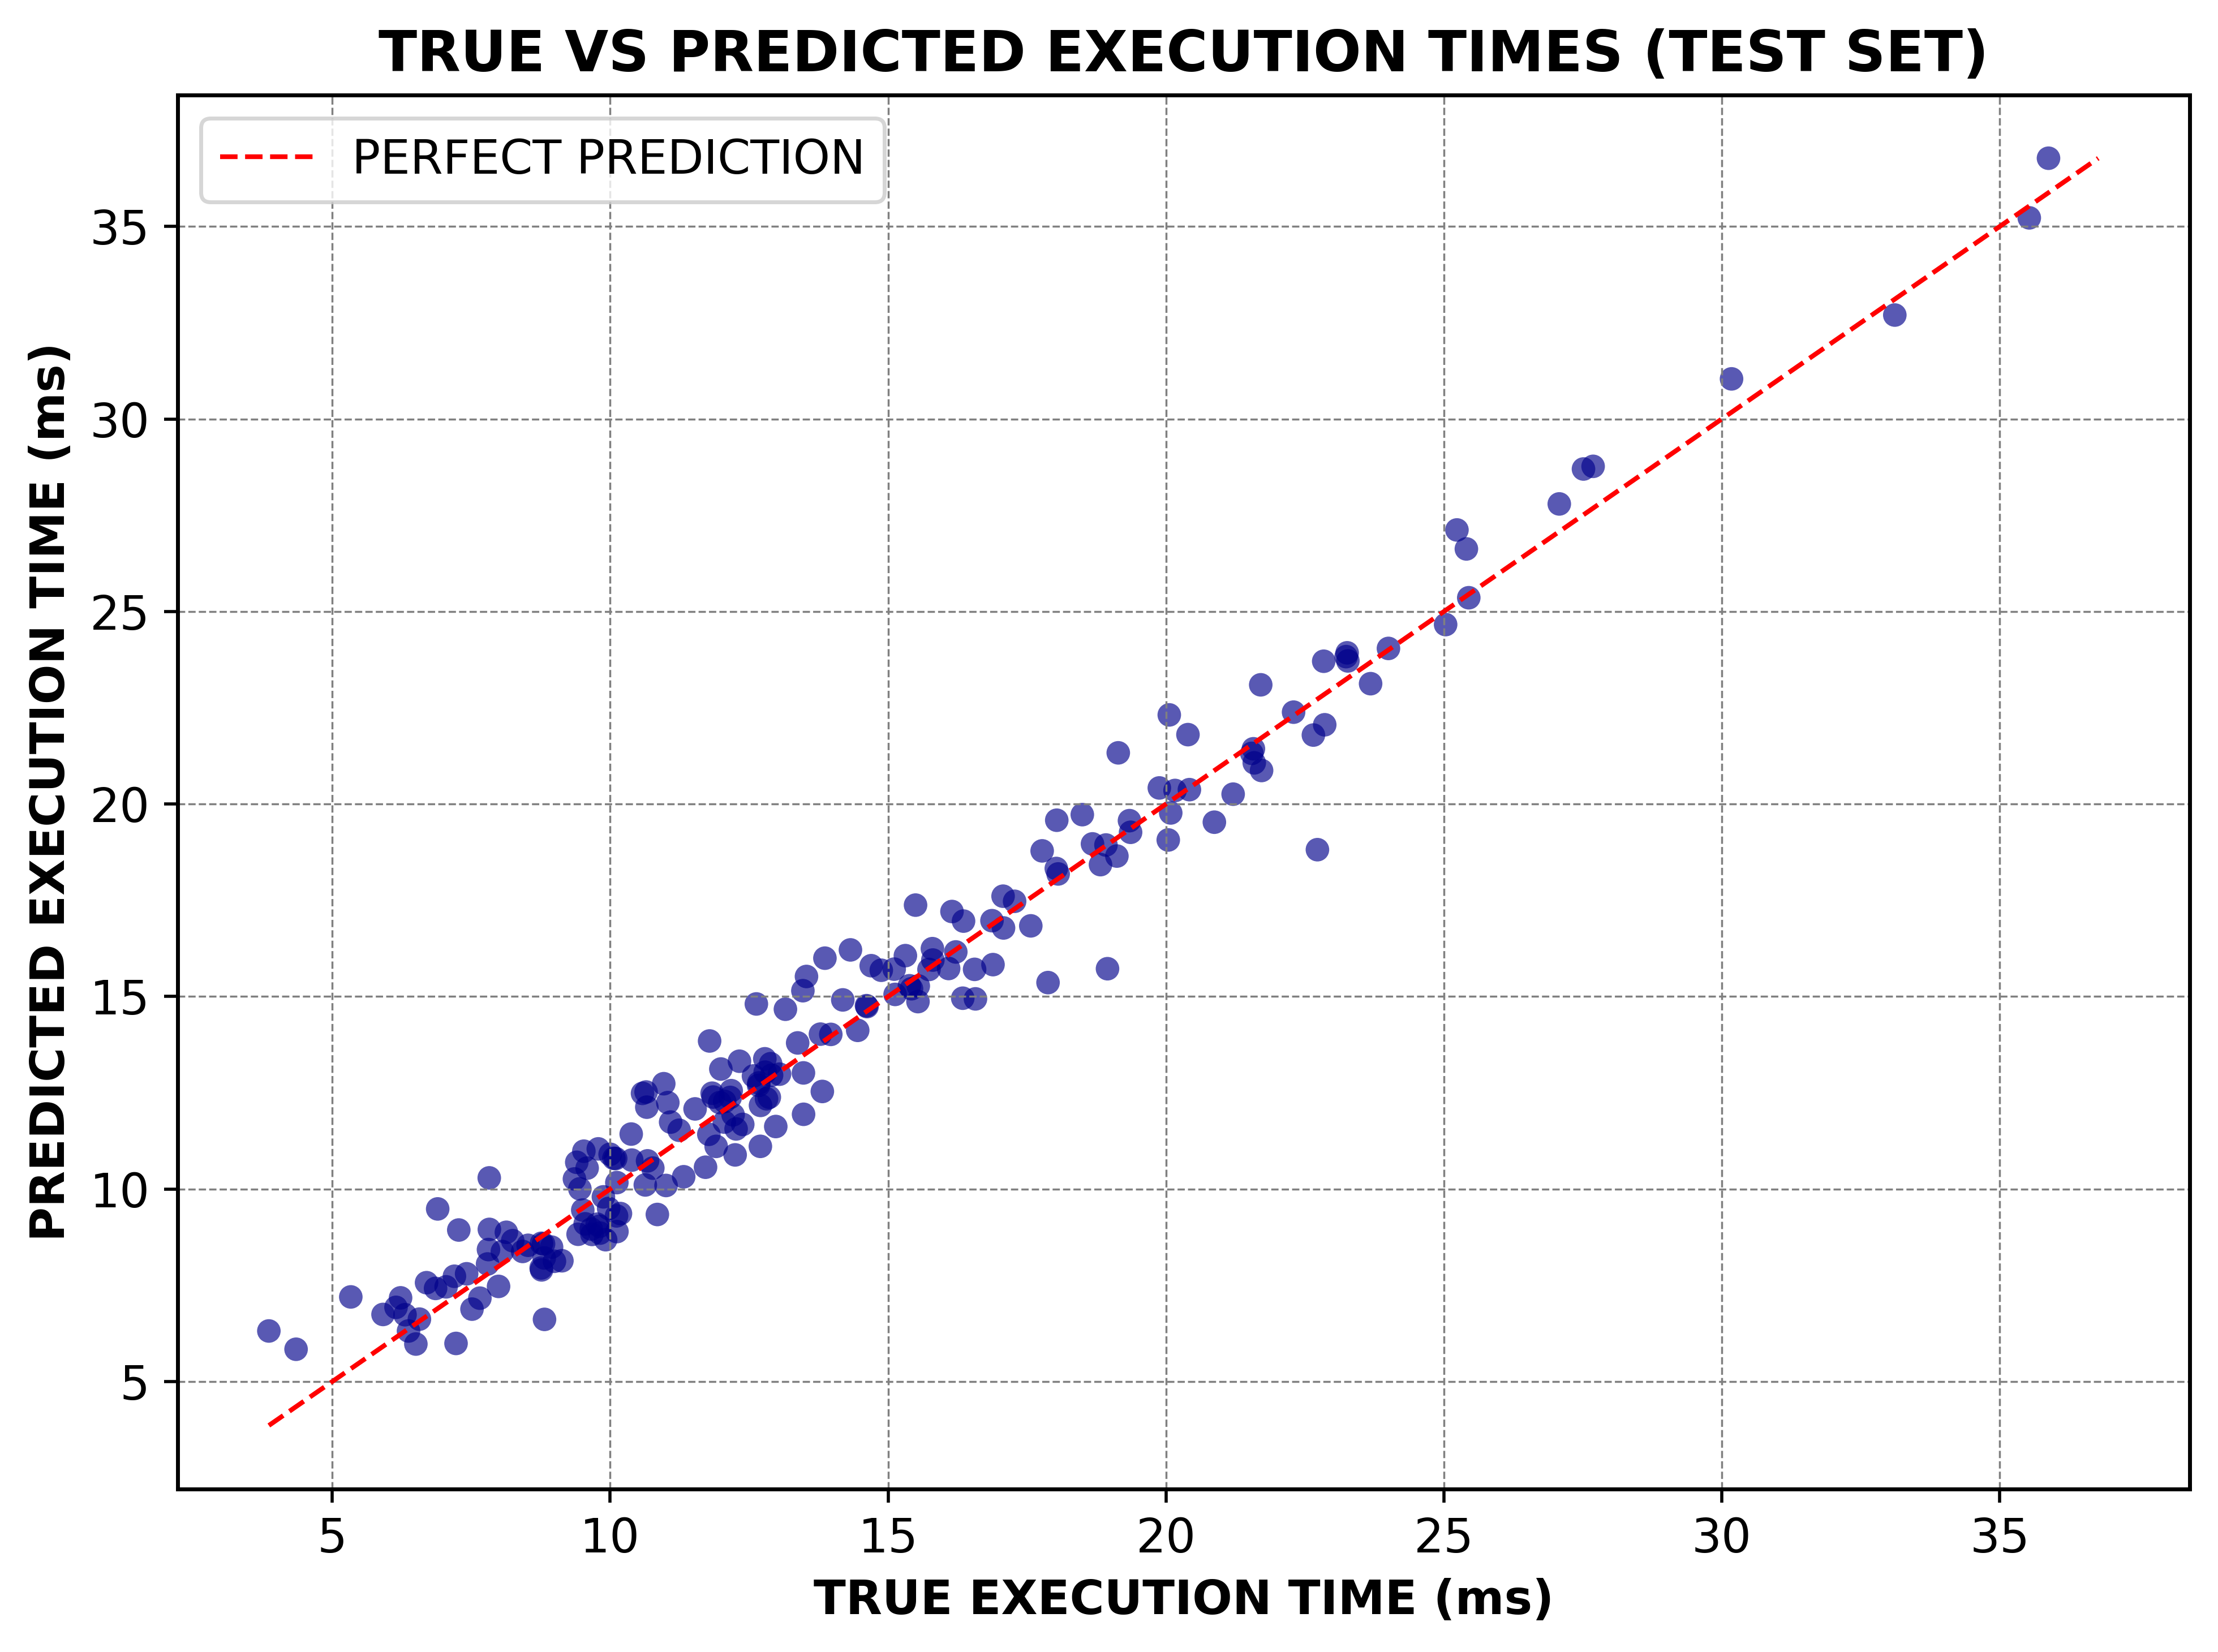

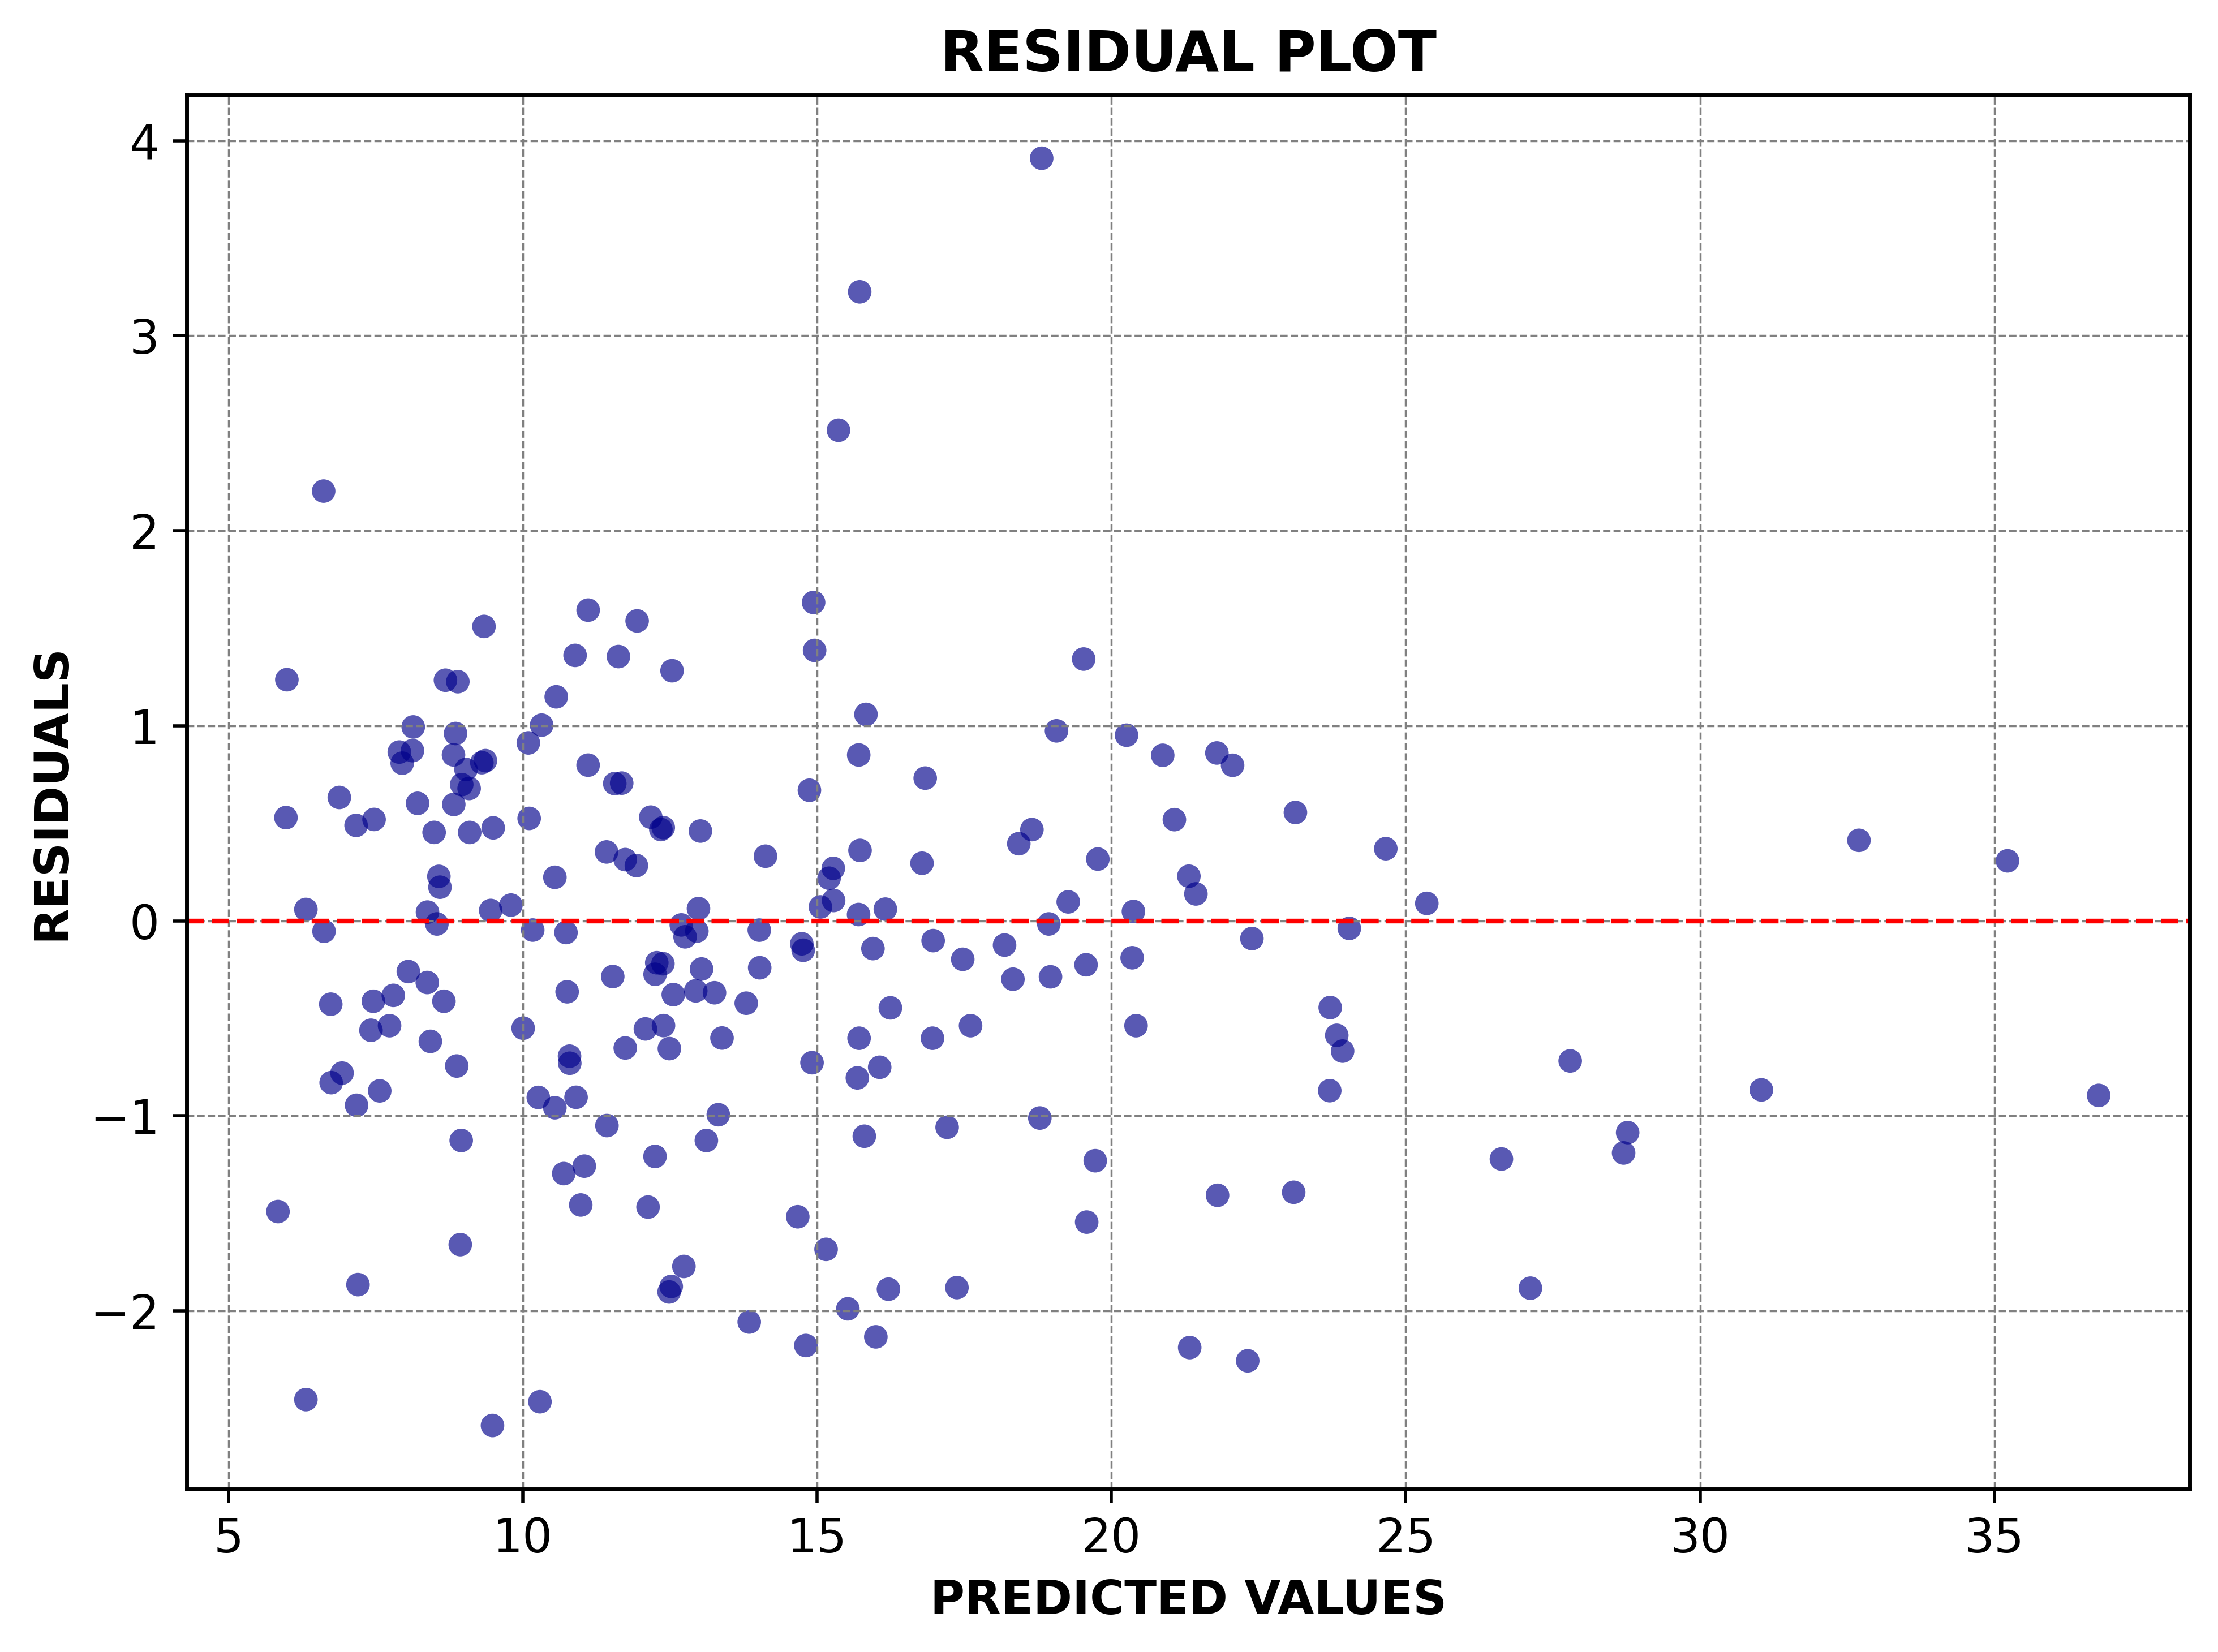

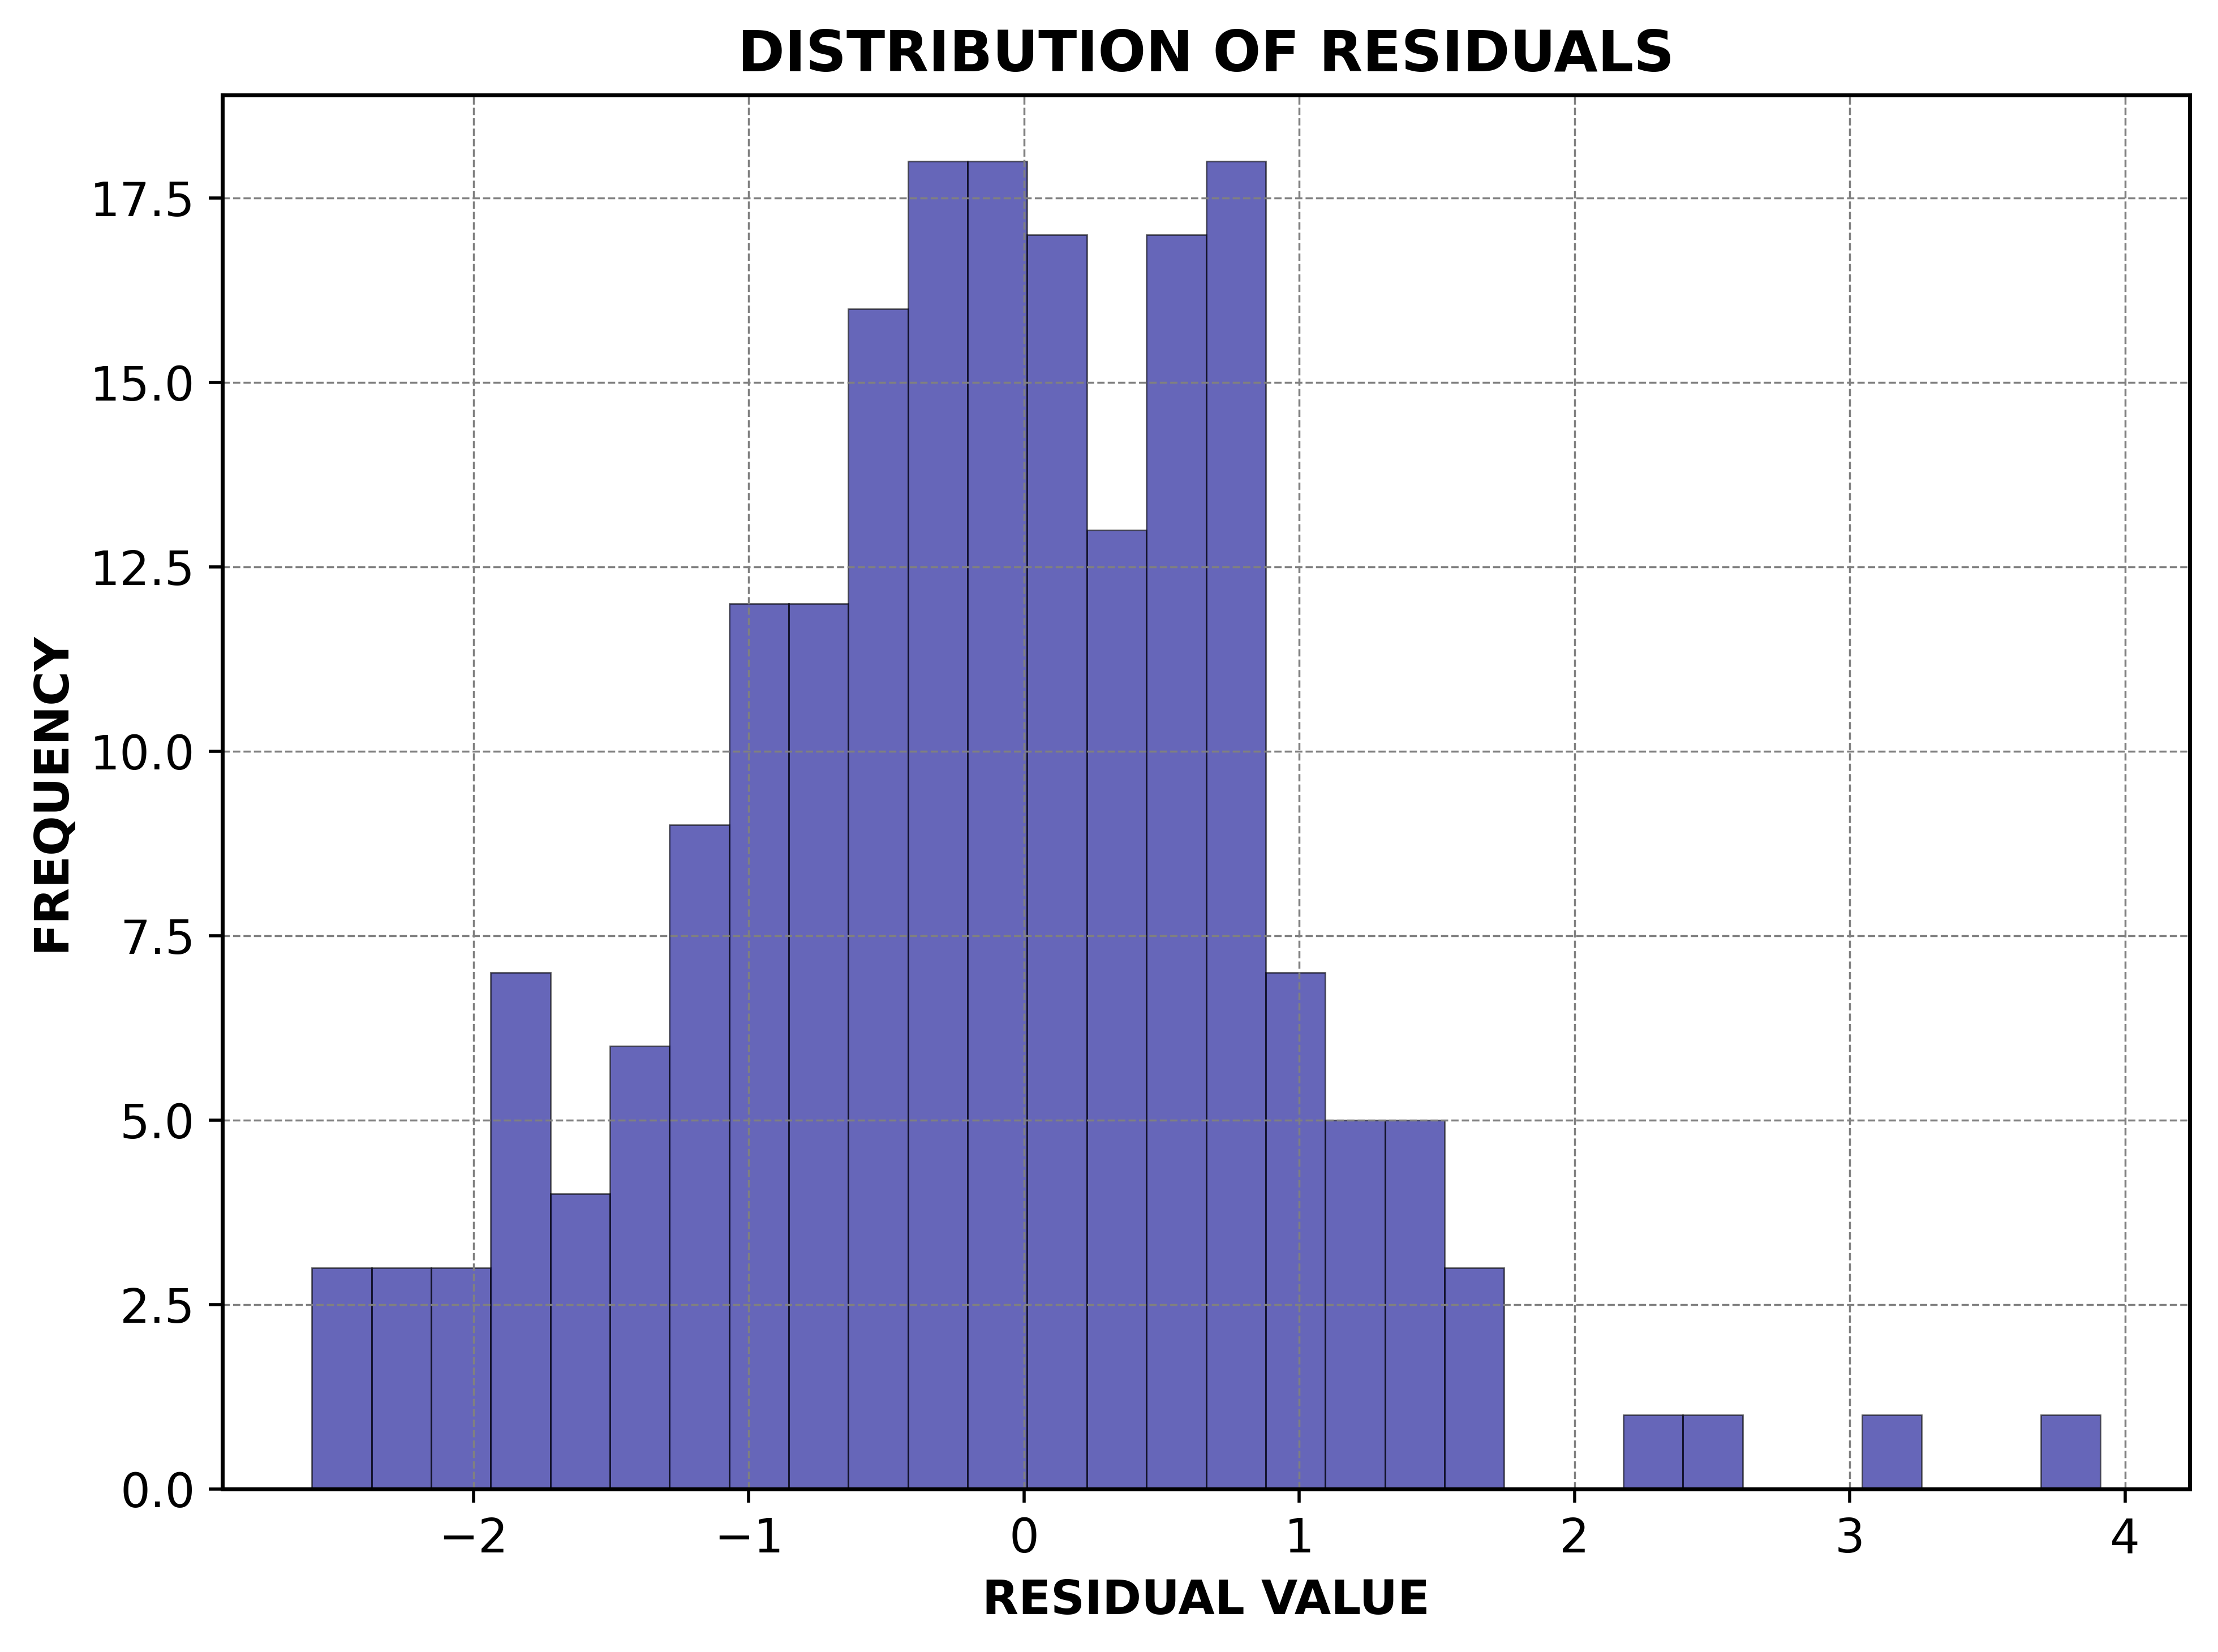

In [4]:
# -------------------------------------------
# GLOBAL STYLE SETTINGS FOR IEEE-LIKE VISUALS
# -------------------------------------------
plt.rcParams.update({
    "font.size": 12,
    "axes.labelweight": "bold",
    "axes.titleweight": "bold",
    "axes.linewidth": 1.0,
    "grid.color": "gray",
    "grid.linestyle": "--",
    "grid.linewidth": 0.5
})

# ----------------------------------------------------------
# SCATTER PLOT: TRUE VS PREDICTED EXECUTION TIME (TEST SET)
# ----------------------------------------------------------
plt.figure(figsize=(8, 6), dpi=500)

# DARK BLUE SCATTER DOTS
plt.scatter(y_test, y_pred_test, color="darkblue", alpha=0.65, edgecolor="none")

# PERFECT PREDICTION LINE (Y = X) IN DASHED RED
min_val = min(np.min(y_test), np.min(y_pred_test))
max_val = max(np.max(y_test), np.max(y_pred_test))
plt.plot([min_val, max_val], [min_val, max_val],
         linestyle="--", color="red", linewidth=1.2, label="PERFECT PREDICTION")

plt.xlabel("TRUE EXECUTION TIME (ms)")
plt.ylabel("PREDICTED EXECUTION TIME (ms)")
plt.title("TRUE VS PREDICTED EXECUTION TIMES (TEST SET)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --------------------------
# RESIDUAL PLOT (TEST DATA)
# --------------------------
residuals = y_test - y_pred_test

plt.figure(figsize=(8, 6), dpi=500)

# DARK BLUE RESIDUAL POINTS
plt.scatter(y_pred_test, residuals, color="darkblue", alpha=0.65, edgecolor="none")

# ZERO-RESIDUAL REFERENCE LINE IN DASHED RED
plt.axhline(0, color="red", linestyle="--", linewidth=1.2)

plt.xlabel("PREDICTED VALUES")
plt.ylabel("RESIDUALS")
plt.title("RESIDUAL PLOT")
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------------------------------------
# HISTOGRAM OF MODEL RESIDUALS (TEST SET)
# ---------------------------------------
plt.figure(figsize=(8, 6), dpi=500)

# DARK BLUE BARS WITH THIN BLACK EDGES
plt.hist(residuals, bins=30, color="darkblue", alpha=0.6,
         edgecolor="black", linewidth=0.4)

plt.xlabel("RESIDUAL VALUE")
plt.ylabel("FREQUENCY")
plt.title("DISTRIBUTION OF RESIDUALS")
plt.grid(True)
plt.tight_layout()
plt.show()


# VISUAL DIAGNOSTICS FOR THE TRAINED MODEL

## 1. TRUE VS PREDICTED VALUES
A STRAIGHT LINE (Y=X) PATTERN WOULD INDICATE PERFECT PREDICTION.  
THE CLOSER THE POINTS ARE TO A DIAGONAL LINE, THE BETTER THE MODEL.

## 2. RESIDUAL PLOT
RESIDUALS SHOULD BE RANDOMLY SCATTERED AROUND ZERO.  
PATTERNS OR CURVATURES SUGGEST THE MODEL MAY BE MISSING NON-LINEAR RELATIONSHIPS.

## 3. RESIDUAL DISTRIBUTION
THE HISTOGRAM SHOULD RESEMBLE A NORMAL DISTRIBUTION.  
HEAVY TAILS OR MULTI-MODAL PATTERNS MAY INDICATE COMPLEX TASK BEHAVIOR  
THAT A LINEAR MODEL CANNOT FULLY CAPTURE.

THESE GRAPHS WILL BE USED IN THE MANUSCRIPT TO VALIDATE THE LR-BASED PREDICTION STEP.

# GENERATE 15 NEW TASKS + PREDICT EXECUTION TIME

In [5]:
# IMPORT REQUIRED LIBRARIES
import numpy as np
import pandas as pd

# -------------------------------
# GENERATE 15 NEW TASKS
# -------------------------------

# USE SAME DISTRIBUTIONS AS TRAINING FOR CONSISTENCY
new_raw_sizes = np.random.lognormal(mean=0.5, sigma=1.2, size=15)
new_task_sizes = 0.001 + (new_raw_sizes / raw_sizes.max()) * (500 - 0.001)

new_cpu_util = np.random.gamma(shape=2.0, scale=15.0, size=15)
new_cpu_util = np.clip(new_cpu_util, 1, 100)

# -------------------------------
# SCALE FEATURES USING TRAINED SCALER
# -------------------------------
new_X = pd.DataFrame({
    "Task_Size_GB": new_task_sizes,
    "CPU_Demand_Units": new_cpu_util
})

new_X_scaled = scaler.transform(new_X)

# -------------------------------
# PREDICT EXECUTION TIME USING TRAINED LR MODEL
# -------------------------------
predicted_time = lr.predict(new_X_scaled)

predicted_time = np.clip(predicted_time, 0, 50)  # SAFETY CLIP

# -------------------------------
# CREATE FINAL TABLE OF NEW TASKS
# -------------------------------
df_new_tasks = pd.DataFrame({
    "Task_ID": np.arange(1, 16),
    "Task_Size_GB": new_task_sizes,
    "CPU_Demand_Units": new_cpu_util,
    "Predicted_Exec_Time_ms": predicted_time
})

# DISPLAY TABLE
df_new_tasks

,Task_ID,Task_Size_GB,CPU_Demand_Units,Predicted_Exec_Time_ms
0,1,17.025160,17.064085,10.459798
1,2,0.891260,63.459051,24.099772
2,3,1.533927,22.294526,11.696735
3,4,3.048309,19.171984,10.788145
4,5,21.683659,43.942744,18.670167
5,6,7.746015,9.077373,7.846482
6,7,1.537756,54.440973,21.393715
7,8,3.384664,15.030535,9.546287
8,9,2.350354,6.639730,6.992466
9,10,2.096059,15.988143,9.806797


# SETUP FOR COS CALCULATION AND QUEUE SIMULATION

WE WILL NOW PREPARE THE DATA FOR THE NEXT STEPS IN THE ALGORITHM:

1. **WINDOW SIZE = 5**
   - COS AND STATISTICAL METRICS (Q1, Q3, IQR, SKEWNESS, KURTOSIS)
     WILL BE COMPUTED OVER EACH 5-TASK WINDOW.

2. **DEFINE QUEUES**
   - IOT QUEUE = 15 TASKS (RAW INPUT)
   - EDGE QUEUE (MAX SIZE = 5)
   - CLOUD QUEUE (MAX SIZE = 10)

3. **RANDOMLY GENERATE COS WEIGHTS**
   - WEIGHTS: (w_S, w_R, w_T)
   - SUBJECT TO CONSTRAINT:
     
     \[
     w_S + w_R + w_T = 1, w_i > 0
     \]

   - THESE WEIGHTS WILL IMPACT HOW COS IS CALCULATED FOR EACH TASK.

4. **LOG COS DISTRIBUTION**
   - FOR EACH TASK IN A WINDOW, LOG:
     - NORMALIZED VALUES
     - COS VALUE
     - STATISTICAL THRESHOLDS
     - ASSIGNED TIER (IOT / EDGE / CLOUD)

THIS LOG WILL BE STORED IN A TABULAR FORM SO THAT  
WE CAN LATER GENERATE:
- BOX PLOTS  
- COS DISTRIBUTION PLOTS  
- KURTOSIS & SKEWNESS PLOTS  
- BAR GRAPH OF TASK DISTRIBUTION ACROSS TIERS


# DEFINE COS WEIGHTS, QUEUES, AND LOG STRUCTURE

In [6]:
# IMPORT REQUIRED LIBRARIES
from scipy.stats import skew, kurtosis

# MAKE SURE DF_NEW_TASKS EXISTS
# DF_NEW_TASKS COLUMNS: TASK_ID, TASK_SIZE_GB, CPU_DEMAND_UNITS, PREDICTED_EXEC_TIME_MS

# -------------------------------
# RANDOMLY GENERATE COS WEIGHTS
# -------------------------------
# GENERATE THREE POSITIVE RANDOM VALUES AND NORMALIZE THEM TO SUM TO 1
raw_weights = np.random.rand(3)
w_S, w_R, w_T = raw_weights / raw_weights.sum()

# LOG AND CHECK CONSTRAINTS
print("COS WEIGHTS:")
print(f"w_S (SIZE)      = {w_S:.4f}")
print(f"w_R (RESOURCE)  = {w_R:.4f}")
print(f"w_T (TIME)      = {w_T:.4f}")
print(f"SUM OF WEIGHTS  = {w_S + w_R + w_T:.4f}")

# -------------------------------
# DEFINE QUEUE CAPACITIES
# -------------------------------
EDGE_CAPACITY = 5
CLOUD_CAPACITY = 10

# EDGE AND CLOUD QUEUES WILL STORE TASK IDS
edge_queue = []
cloud_queue = []

# -------------------------------
# PREPARE LOG LIST FOR STORING RESULTS
# -------------------------------
log_records = []  # EACH ENTRY WILL BE A DICTIONARY PER TASK DECISION

# WINDOW SIZE FOR STATISTICAL COMPUTATION
WINDOW_SIZE = 5

COS WEIGHTS:
w_S (SIZE)      = 0.4315
w_R (RESOURCE)  = 0.4163
w_T (TIME)      = 0.1522
SUM OF WEIGHTS  = 1.0000


# IMPLEMENT COS CALCULATION AND SLIDING WINDOW PROCESSING

In [7]:
# FUNCTION TO NORMALIZE A SERIES SAFELY (MIN-MAX)
def safe_min_max_normalize(series):
    # HANDLE CONSTANT SERIES WHERE MAX == MIN
    s_min = series.min()
    s_max = series.max()
    if s_max == s_min:
        # RETURN 0.5 FOR ALL VALUES IF THERE IS NO VARIATION
        return pd.Series([0.5] * len(series), index=series.index)
    return (series - s_min) / (s_max - s_min)


# -------------------------------
# PROCESS TASKS ONE BY ONE USING A SLIDING WINDOW
# -------------------------------
for idx, row in df_new_tasks.iterrows():
    task_id = int(row["Task_ID"])

    # DETERMINE CURRENT WINDOW RANGE (LAST UP TO 5 TASKS)
    start_idx = max(0, idx - WINDOW_SIZE + 1)
    end_idx = idx  # INCLUSIVE

    window_df = df_new_tasks.loc[start_idx:end_idx].copy()
    window_id = end_idx + 1  # 1-BASED WINDOW ID FOR LOGGING

    # -------------------------------
    # NORMALIZE S, R, T WITHIN CURRENT WINDOW
    # -------------------------------
    window_df["S_norm"] = safe_min_max_normalize(window_df["Task_Size_GB"])
    window_df["R_norm"] = safe_min_max_normalize(window_df["CPU_Demand_Units"])
    window_df["T_norm"] = safe_min_max_normalize(window_df["Predicted_Exec_Time_ms"])

    # -------------------------------
    # COMPUTE COS FOR EACH TASK IN THE WINDOW
    # -------------------------------
    window_df["COS"] = (
        w_S * window_df["S_norm"]
        + w_R * window_df["R_norm"]
        + w_T * window_df["T_norm"]
    )

    # -------------------------------
    # COMPUTE STATISTICS OVER COS IN THE WINDOW
    # -------------------------------
    cos_values = window_df["COS"]
    Q1 = np.percentile(cos_values, 25)
    Q3 = np.percentile(cos_values, 75)
    IQR = Q3 - Q1

    cos_skewness = skew(cos_values, bias=False)
    cos_kurtosis = kurtosis(cos_values, fisher=False, bias=False)  # PEARSON STYLE

    # DEFINE THRESHOLDS
    LOWER_FENCE = Q1 - 1.5 * IQR
    UPPER_FENCE = Q3 + 1.5 * IQR
    K_THRESHOLD = 3.5  # EXAMPLE VOLATILITY THRESHOLD

    # GET CURRENT TASK'S COS
    current_cos = float(window_df.loc[end_idx, "COS"])

    # -------------------------------
    # OUTLIER AND VOLATILITY CHECKS FOR CURRENT TASK
    # -------------------------------
    is_outlier = (current_cos < LOWER_FENCE) or (current_cos > UPPER_FENCE)
    is_volatile = cos_kurtosis > K_THRESHOLD
    is_anomaly = is_outlier and is_volatile

    # -------------------------------
    # PRIMARY IQR-BASED TIER DECISION (STATISTICAL)
    # -------------------------------
    if current_cos < Q1:
        stat_decision = "IoT"
    elif current_cos > Q3:
        stat_decision = "Cloud"
    else:
        stat_decision = "Edge"

    # -------------------------------
    # STRESS AND FALLBACK LOGIC (IF-ELSE INSTEAD OF ML)
    # -------------------------------
    stress_flag = False
    stress_action = None

    # IF ANOMALY, WE PREFERRABLY SEND TO CLOUD (IF POSSIBLE)
    if is_anomaly:
        target_tier = "Cloud"
        anomaly_flag = True
    else:
        target_tier = stat_decision
        anomaly_flag = False

    # CHECK STRESS: IF EDGE QUEUE FULL AND CURRENT DECISION IS EDGE
    if target_tier == "Edge" and len(edge_queue) >= EDGE_CAPACITY:
        stress_flag = True
        stress_action = "EdgeFull_OffloadToCloud"
        print("SYSTEM-IN-STRESS, INITIATING FALL BACK MECHANISM:")
        print("EDGE QUEUE FULL -> REDIRECTING TASK TO CLOUD")

        target_tier = "Cloud"  # FALLBACK TO CLOUD

    # IF CLOUD ALSO FULL -> STOP OFFLOADING
    if target_tier == "Cloud" and len(cloud_queue) >= CLOUD_CAPACITY:
        stress_flag = True
        stress_action = "EdgeCloudFull_StopOffloading"
        print("SYSTEM-IN-STRESS, INITIATING FALL BACK MECHANISM:")
        print("EDGE AND CLOUD QUEUES FULL -> STOPPING OFFLOADING FOR THIS TASK")

        final_tier = "StopOffloading"
    else:
        final_tier = target_tier

    # -------------------------------
    # UPDATE QUEUES BASED ON FINAL TIER
    # -------------------------------
    if final_tier == "Edge":
        edge_queue.append(task_id)
    elif final_tier == "Cloud":
        cloud_queue.append(task_id)
    # IF IoT OR StopOffloading: WE DO NOT ADD TO EDGE/CLOUD HERE

    # -------------------------------
    # LOG RECORD FOR THIS TASK
    # -------------------------------
    log_records.append({
        "Task_ID": task_id,
        "Window_ID": window_id,
        "Task_Size_GB": row["Task_Size_GB"],
        "CPU_Demand_Units": row["CPU_Demand_Units"],
        "Predicted_Exec_Time_ms": row["Predicted_Exec_Time_ms"],
        "COS": current_cos,
        "Q1": Q1,
        "Q3": Q3,
        "IQR": IQR,
        "Skewness": cos_skewness,
        "Kurtosis": cos_kurtosis,
        "Is_Outlier": is_outlier,
        "Is_Volatile": is_volatile,
        "Is_Anomaly": anomaly_flag,
        "Statistical_Tier": stat_decision,
        "Final_Tier": final_tier,
        "Stress_Flag": stress_flag,
        "Stress_Action": stress_action,
        "Edge_Queue_Length": len(edge_queue),
        "Cloud_Queue_Length": len(cloud_queue)
    })

# CONVERT LOG TO DATAFRAME
df_log = pd.DataFrame(log_records)

SYSTEM-IN-STRESS, INITIATING FALL BACK MECHANISM:
EDGE QUEUE FULL -> REDIRECTING TASK TO CLOUD


# QUICK SUMMARY OF TIER DISTRIBUTION AND ANOMALIES

In [8]:
# COUNT HOW MANY TASKS WENT WHERE
tier_counts = df_log["Final_Tier"].value_counts()
print("FINAL TIER DISTRIBUTION:")
print(tier_counts)

print("\nNUMBER OF ANOMALOUS TASKS (OUTLIER AND VOLATILE):")
print(df_log["Is_Anomaly"].sum())

# SHOW FIRST FEW ROWS OF LOG AS A SANITY CHECK
df_log.head()

FINAL TIER DISTRIBUTION:
Final_Tier
Cloud    6
Edge     5
IoT      4
Name: count, dtype: int64

NUMBER OF ANOMALOUS TASKS (OUTLIER AND VOLATILE):
0


,Task_ID,Window_ID,Task_Size_GB,CPU_Demand_Units,Predicted_Exec_Time_ms,COS,Q1,Q3,IQR,Skewness,Kurtosis,Is_Outlier,Is_Volatile,Is_Anomaly,Statistical_Tier,Final_Tier,Stress_Flag,Stress_Action,Edge_Queue_Length,Cloud_Queue_Length
0,1,1,17.025160,17.064085,10.459798,0.500000,0.500000,0.500000,0.000000,NaN,NaN,False,False,False,Edge,Edge,False,None,1,0
1,2,2,0.891260,63.459051,24.099772,0.568545,0.465728,0.534272,0.068545,0.000000,1.000000,False,False,False,Cloud,Cloud,False,None,1,1
2,3,3,1.533927,22.294526,11.696735,0.077926,0.254690,0.500000,0.245310,-1.178350,1.500000,False,False,False,IoT,IoT,False,None,1,1
3,4,4,3.048309,19.171984,10.788145,0.080264,0.079679,0.465728,0.386049,0.254968,-1.545653,False,False,False,Edge,Edge,False,None,2,1
4,5,5,21.683659,43.942744,18.670167,0.764277,0.074075,0.568545,0.494470,0.357972,1.037221,False,False,False,Cloud,Cloud,False,None,2,2


# VISUALIZE COS, STATISTICS, AND TIERING BEHAVIOR

# BOX PLOT OF COS (ALL TASKS)

THIS FIGURE SHOWS THE OVERALL DISTRIBUTION OF COMPOSITE OFFLOADING SCORES (COS) 
FOR ALL 15 TASKS. THE PLOT USES IEEE STYLE — HIGH DPI, CLEAN GRID, AND LARGE FONTS.

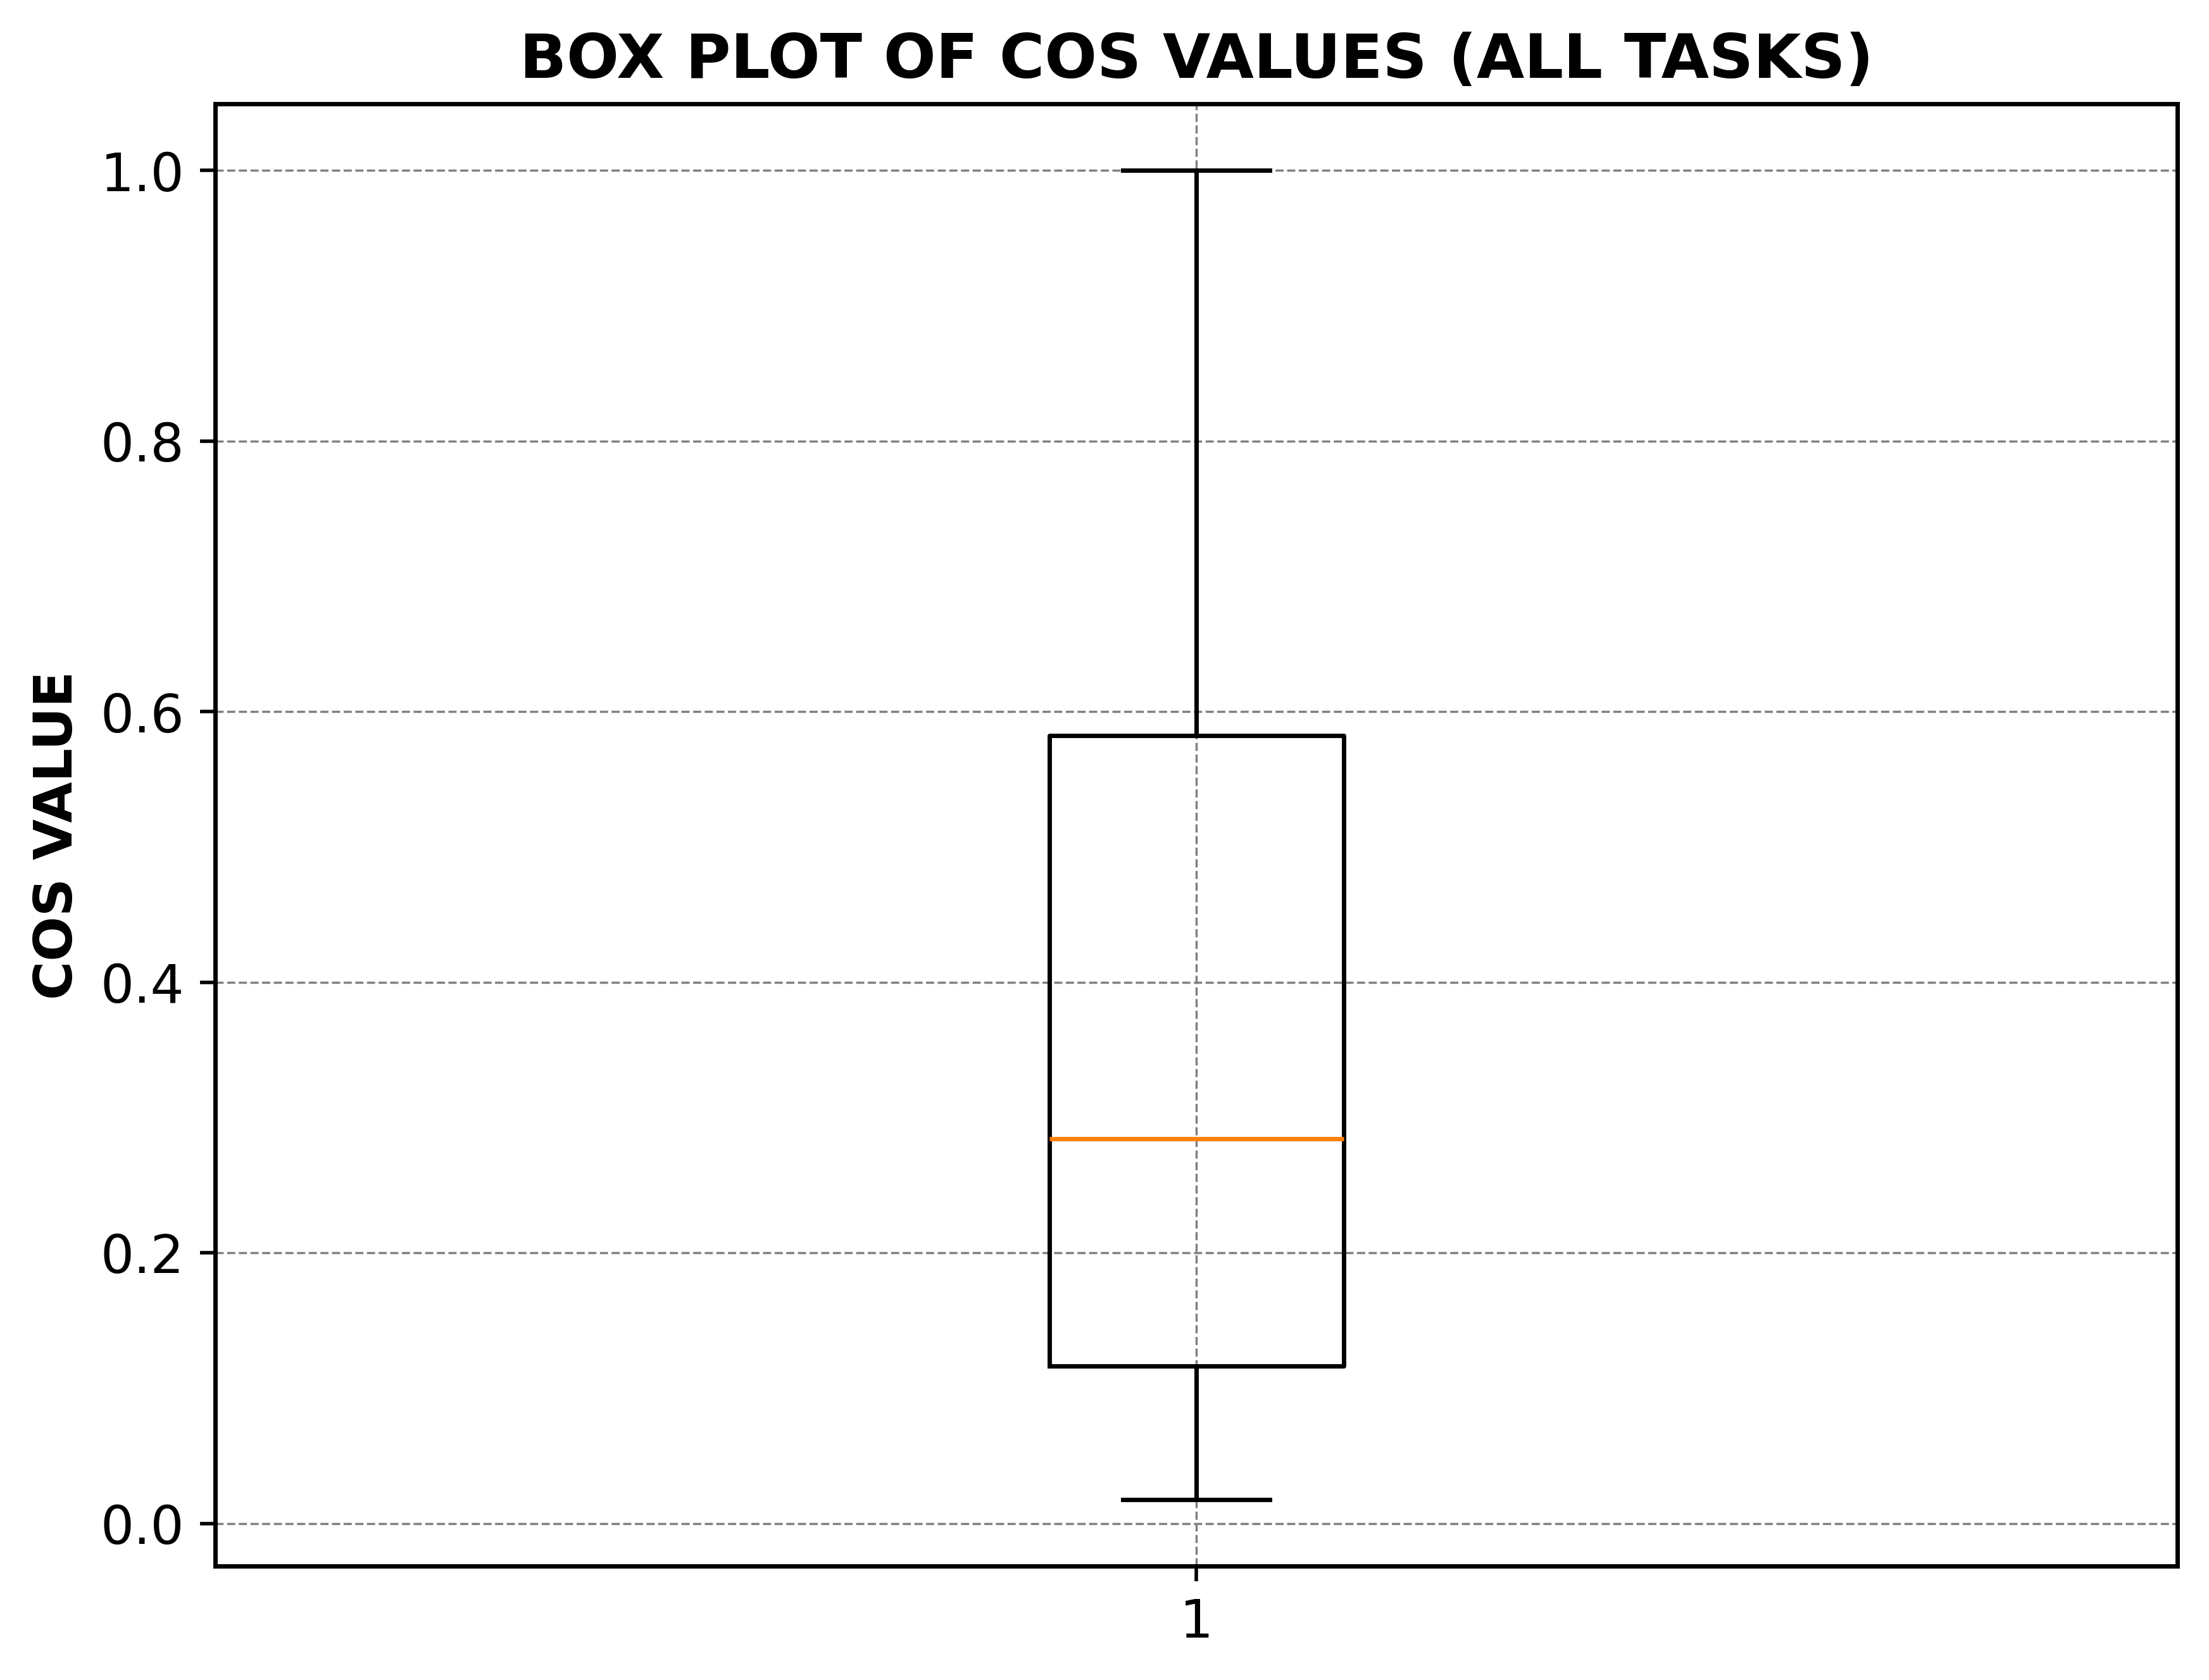

In [10]:
plt.figure(figsize=(8, 6), dpi=500)
plt.boxplot(df_log["COS"], vert=True)
plt.title("BOX PLOT OF COS VALUES (ALL TASKS)", fontsize=14)
plt.ylabel("COS VALUE", fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

# COS SCATTER PLOT WITH TIER LABELS

THE SCATTER PLOT VISUALIZES EACH TASK'S COMPOSITE OFFLOADING SCORE.  
COLOR CODING SHOWS WHICH LAYER (IOT / EDGE / CLOUD / STOP-OFFLOADING) THE TASK WAS FINALLY ASSIGNED TO.

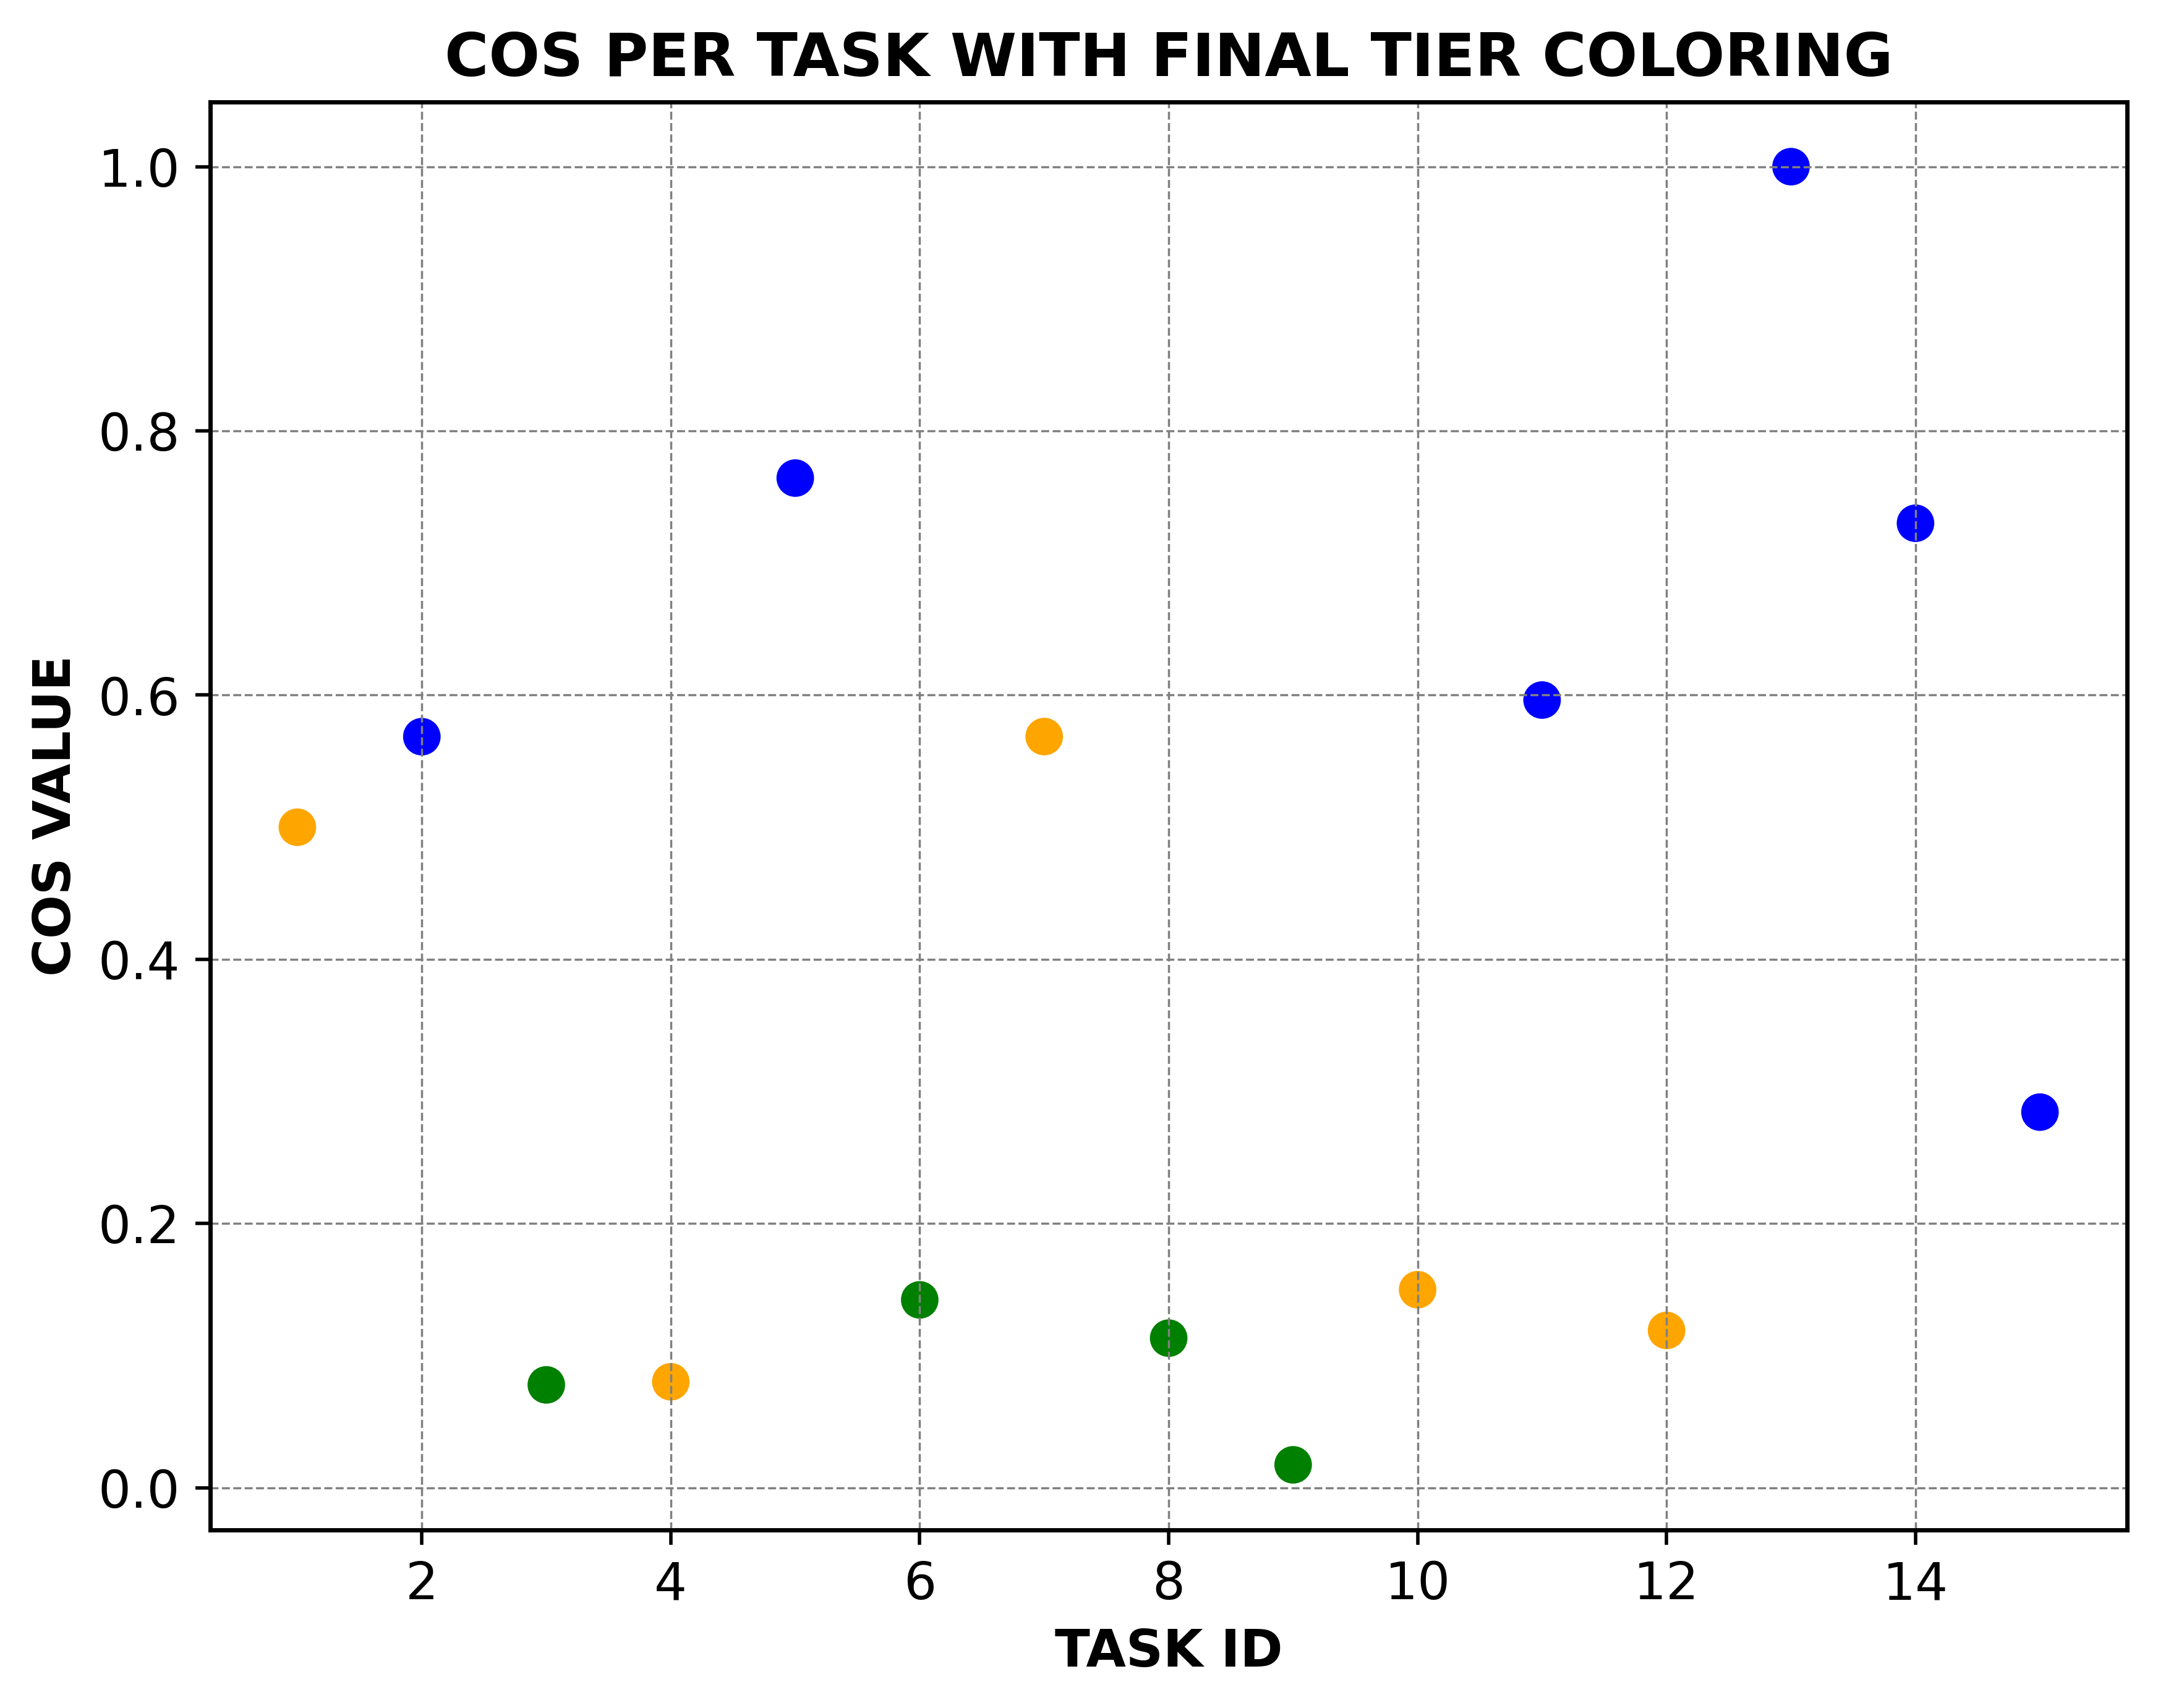

In [12]:
color_map = {
    "IoT": "green",
    "Edge": "orange",
    "Cloud": "blue",
    "StopOffloading": "red"
}

colors = df_log["Final_Tier"].map(color_map)

plt.figure(figsize=(8, 6), dpi=500)
plt.scatter(df_log["Task_ID"], df_log["COS"], c=colors, s=60)
plt.xlabel("TASK ID", fontsize=12)
plt.ylabel("COS VALUE", fontsize=12)
plt.title("COS PER TASK WITH FINAL TIER COLORING", fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()


# SKEWNESS AND KURTOSIS OF COS OVER SLIDING WINDOWS

THIS PLOT ANALYZES THE STATISTICAL SHAPE OF THE COS DISTRIBUTION.  
SKEWNESS INDICATES ASYMMETRY, WHILE KURTOSIS CAPTURES VOLATILITY AND TAIL-BEHAVIOR.

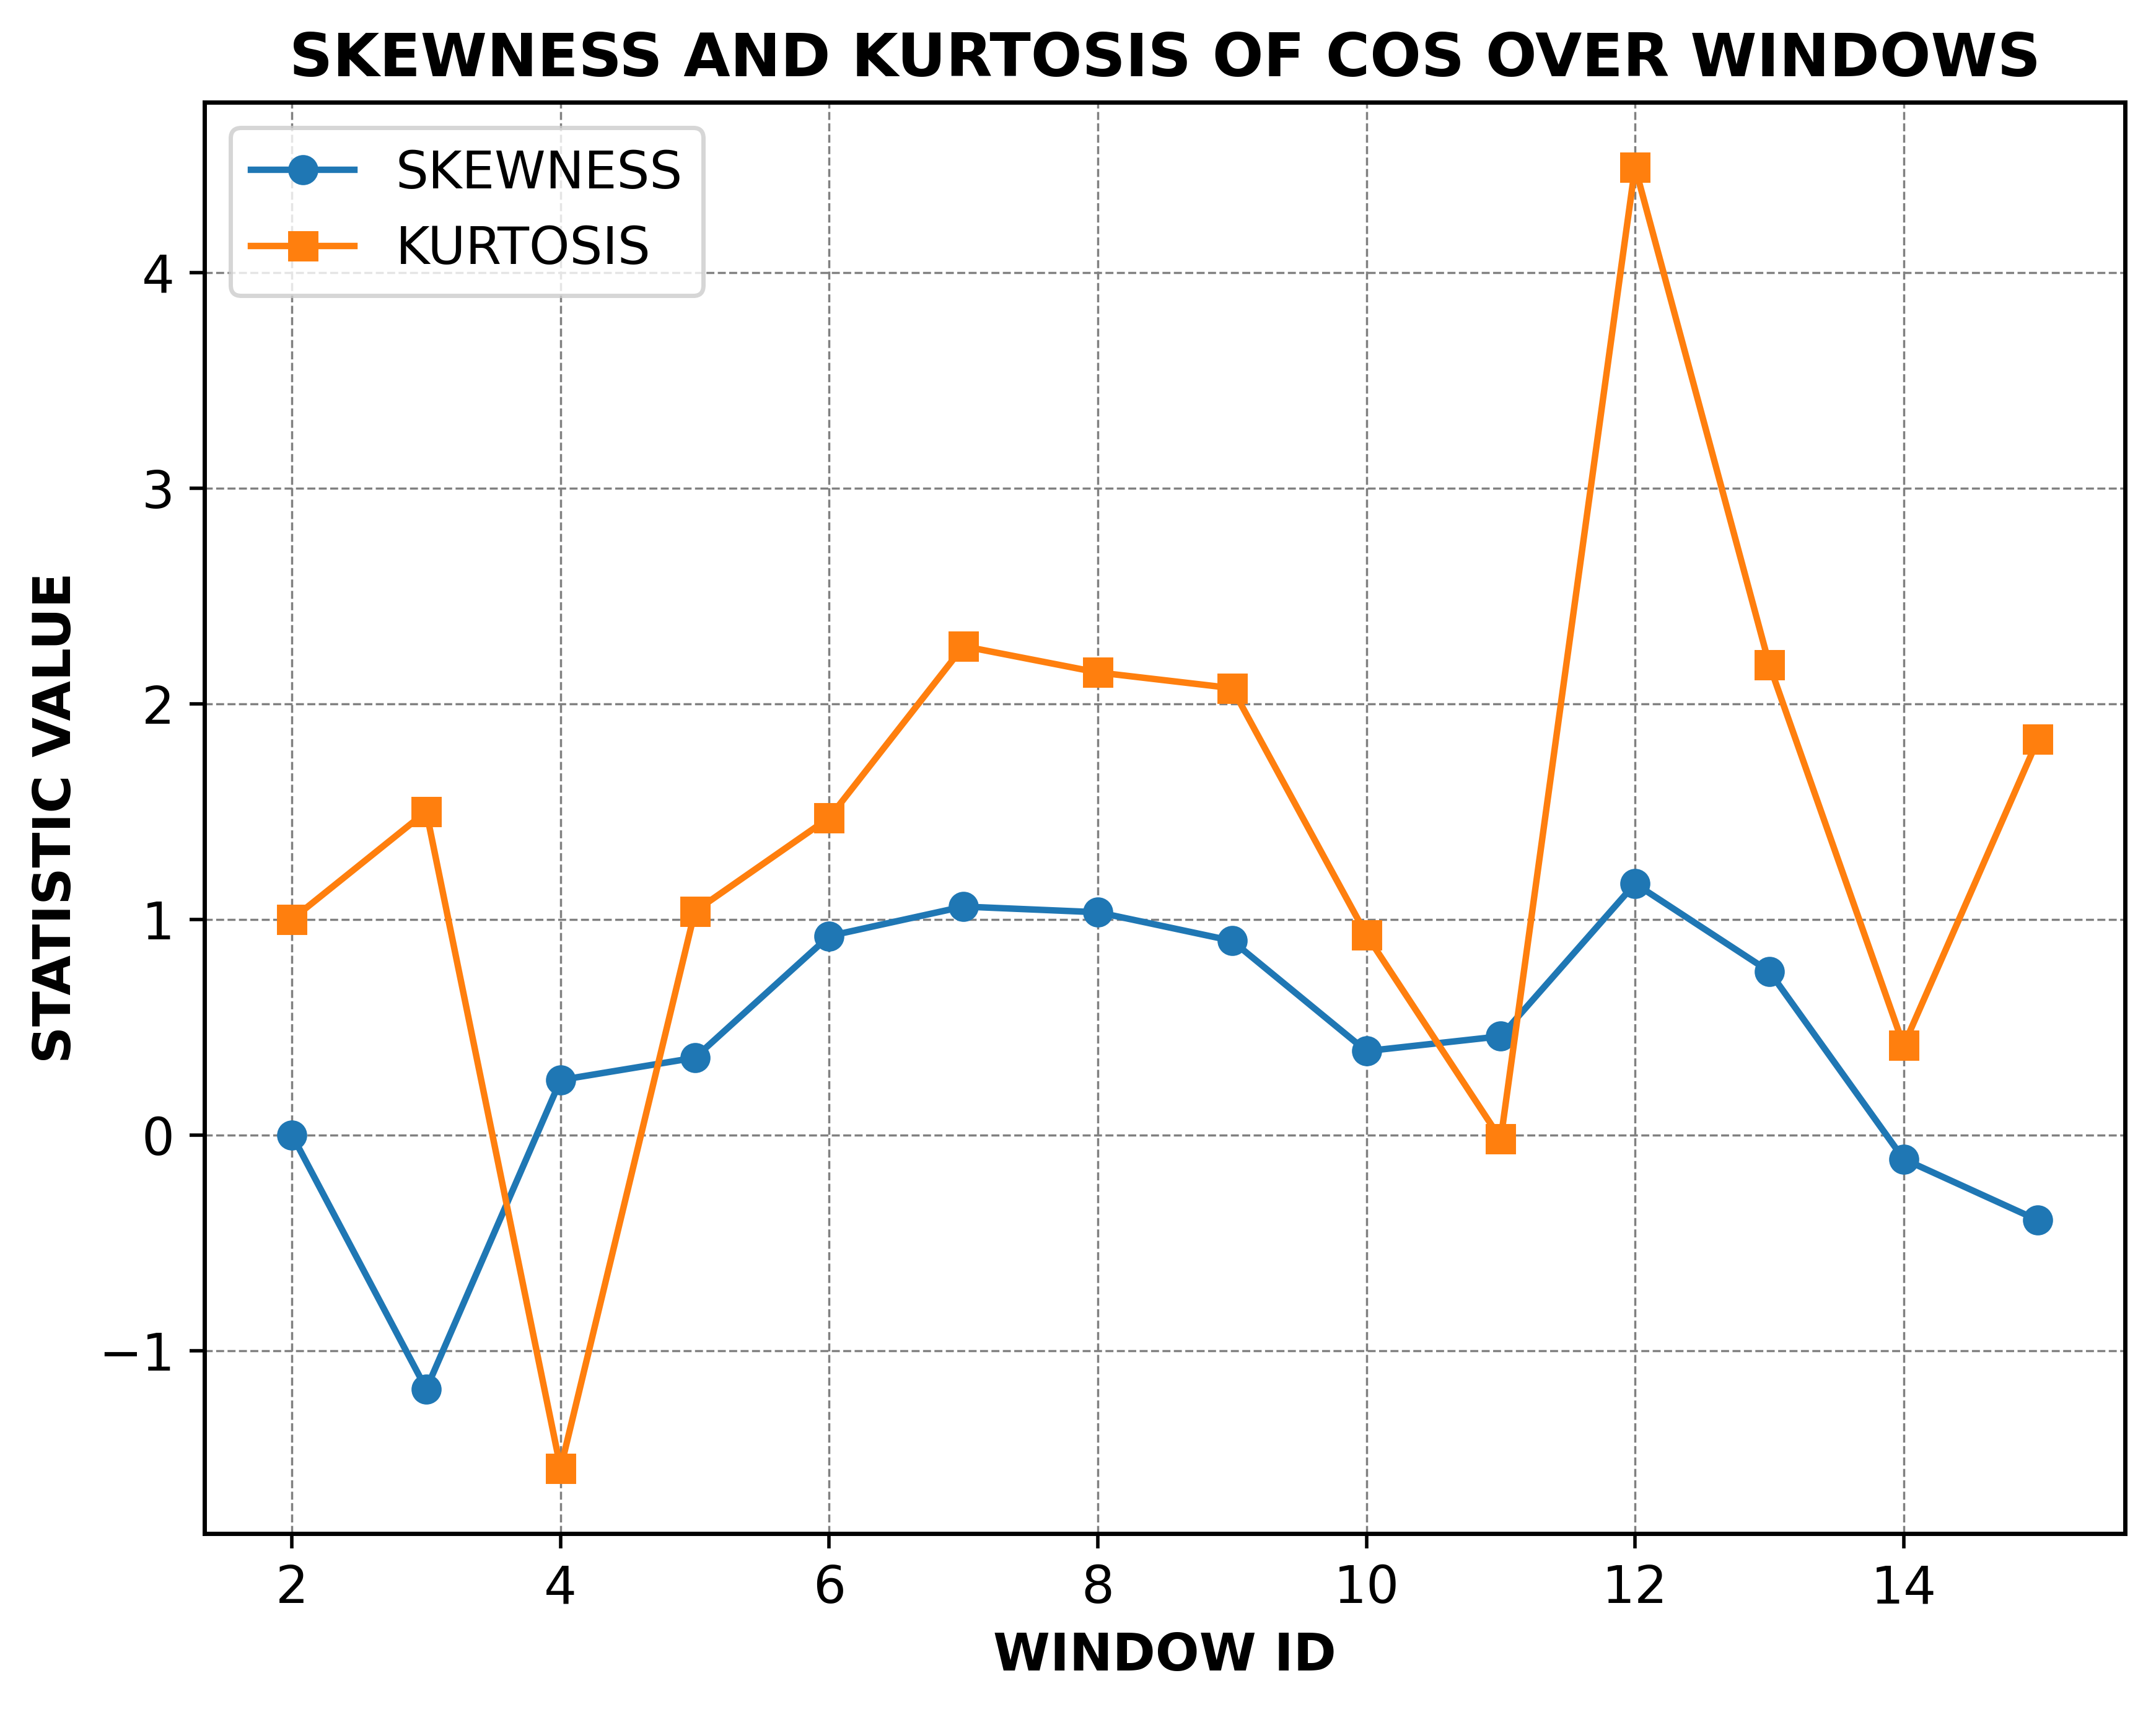

In [13]:
plt.figure(figsize=(8, 6), dpi=500)
plt.plot(df_log["Window_ID"], df_log["Skewness"], marker="o", label="SKEWNESS")
plt.plot(df_log["Window_ID"], df_log["Kurtosis"], marker="s", label="KURTOSIS")

plt.xlabel("WINDOW ID", fontsize=12)
plt.ylabel("STATISTIC VALUE", fontsize=12)
plt.title("SKEWNESS AND KURTOSIS OF COS OVER WINDOWS", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

# NUMBER OF TASKS ASSIGNED TO EACH TIER

THIS BAR CHART SHOWS HOW MANY TASKS WERE HANDLED BY EACH LAYER.  
THIS HIGHLIGHTS THE EFFECTIVENESS OF STATISTICAL TIERING, 
ANOMALY DETECTION, AND FALLBACK MECHANISMS.

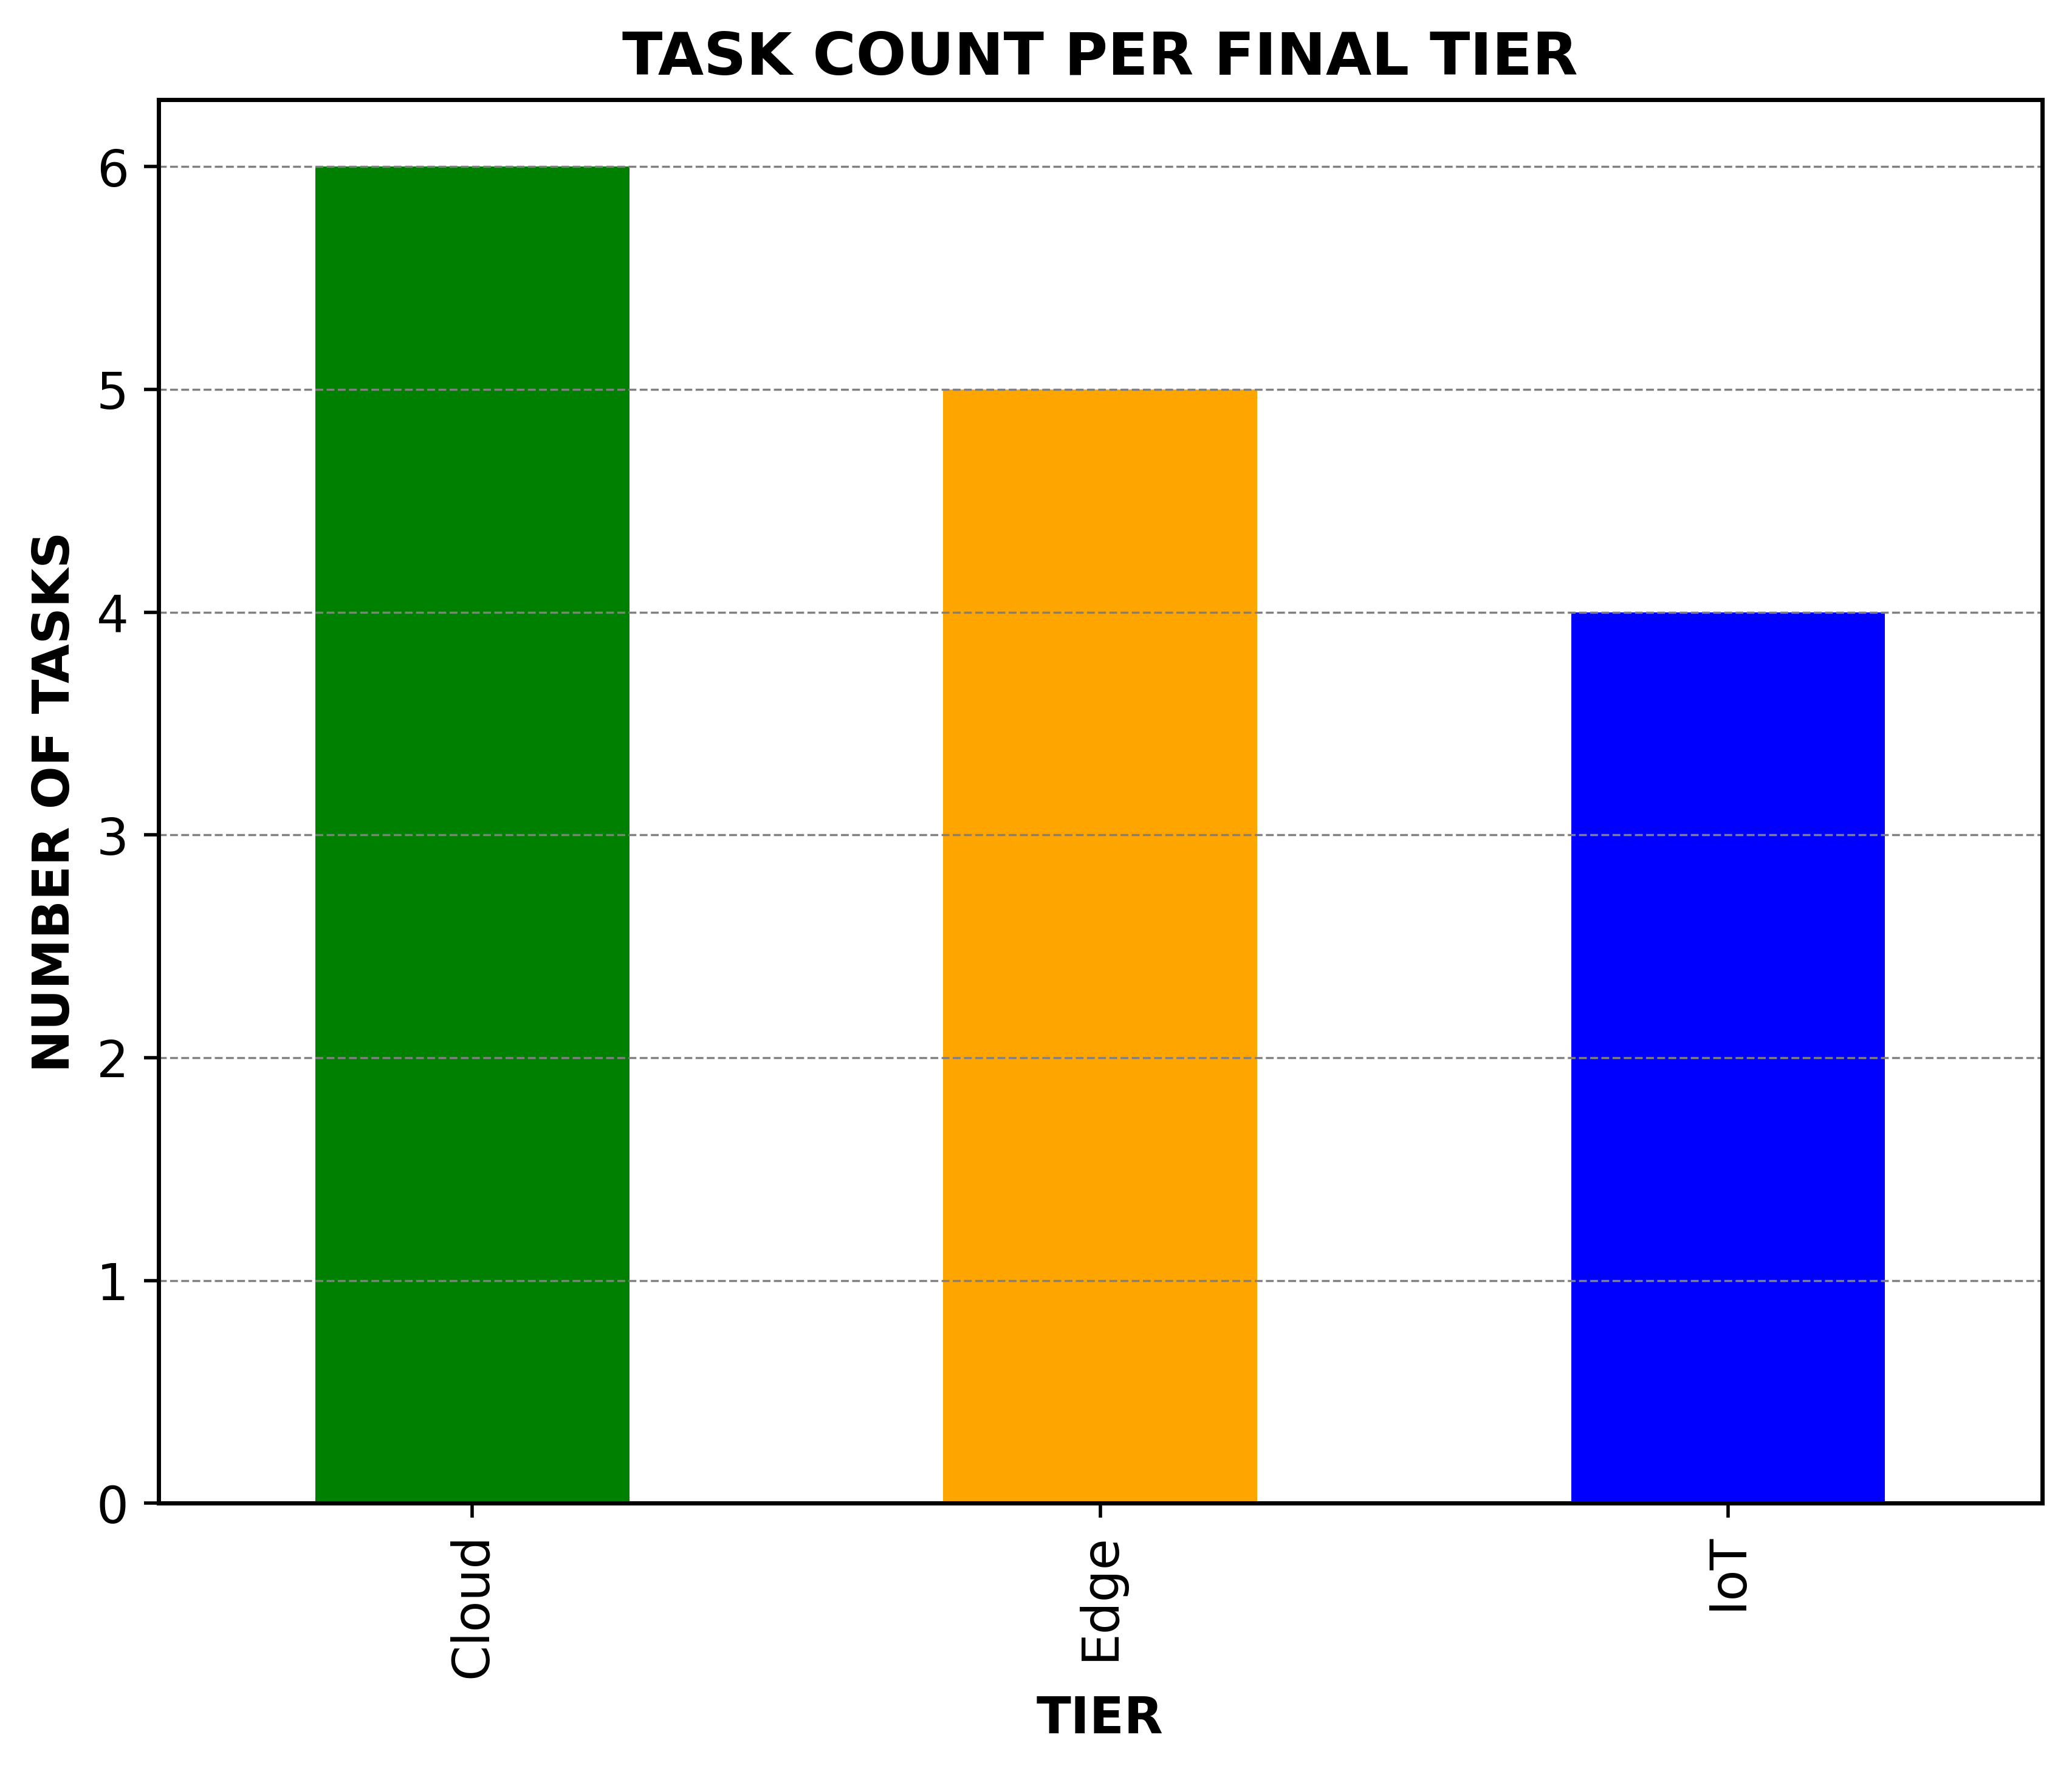

In [14]:
tier_counts = df_log["Final_Tier"].value_counts()

plt.figure(figsize=(8, 6), dpi=500)
tier_counts.plot(kind="bar", color=["green", "orange", "blue", "red"])

plt.title("TASK COUNT PER FINAL TIER", fontsize=14)
plt.xlabel("TIER", fontsize=12)
plt.ylabel("NUMBER OF TASKS", fontsize=12)
plt.grid(axis="y", linestyle='--', linewidth=0.5)
plt.show()

# ANOMALIES IDENTIFIED BY STATISTICAL + VOLATILITY CHECK

TASKS MARKED AS OUTLIERS **AND** UNDER HIGH KURTOSIS  
ARE FLAGGED AS ANOMALIES.  
THIS PLOT HIGHLIGHTS THEM WITH A RED CROSS.

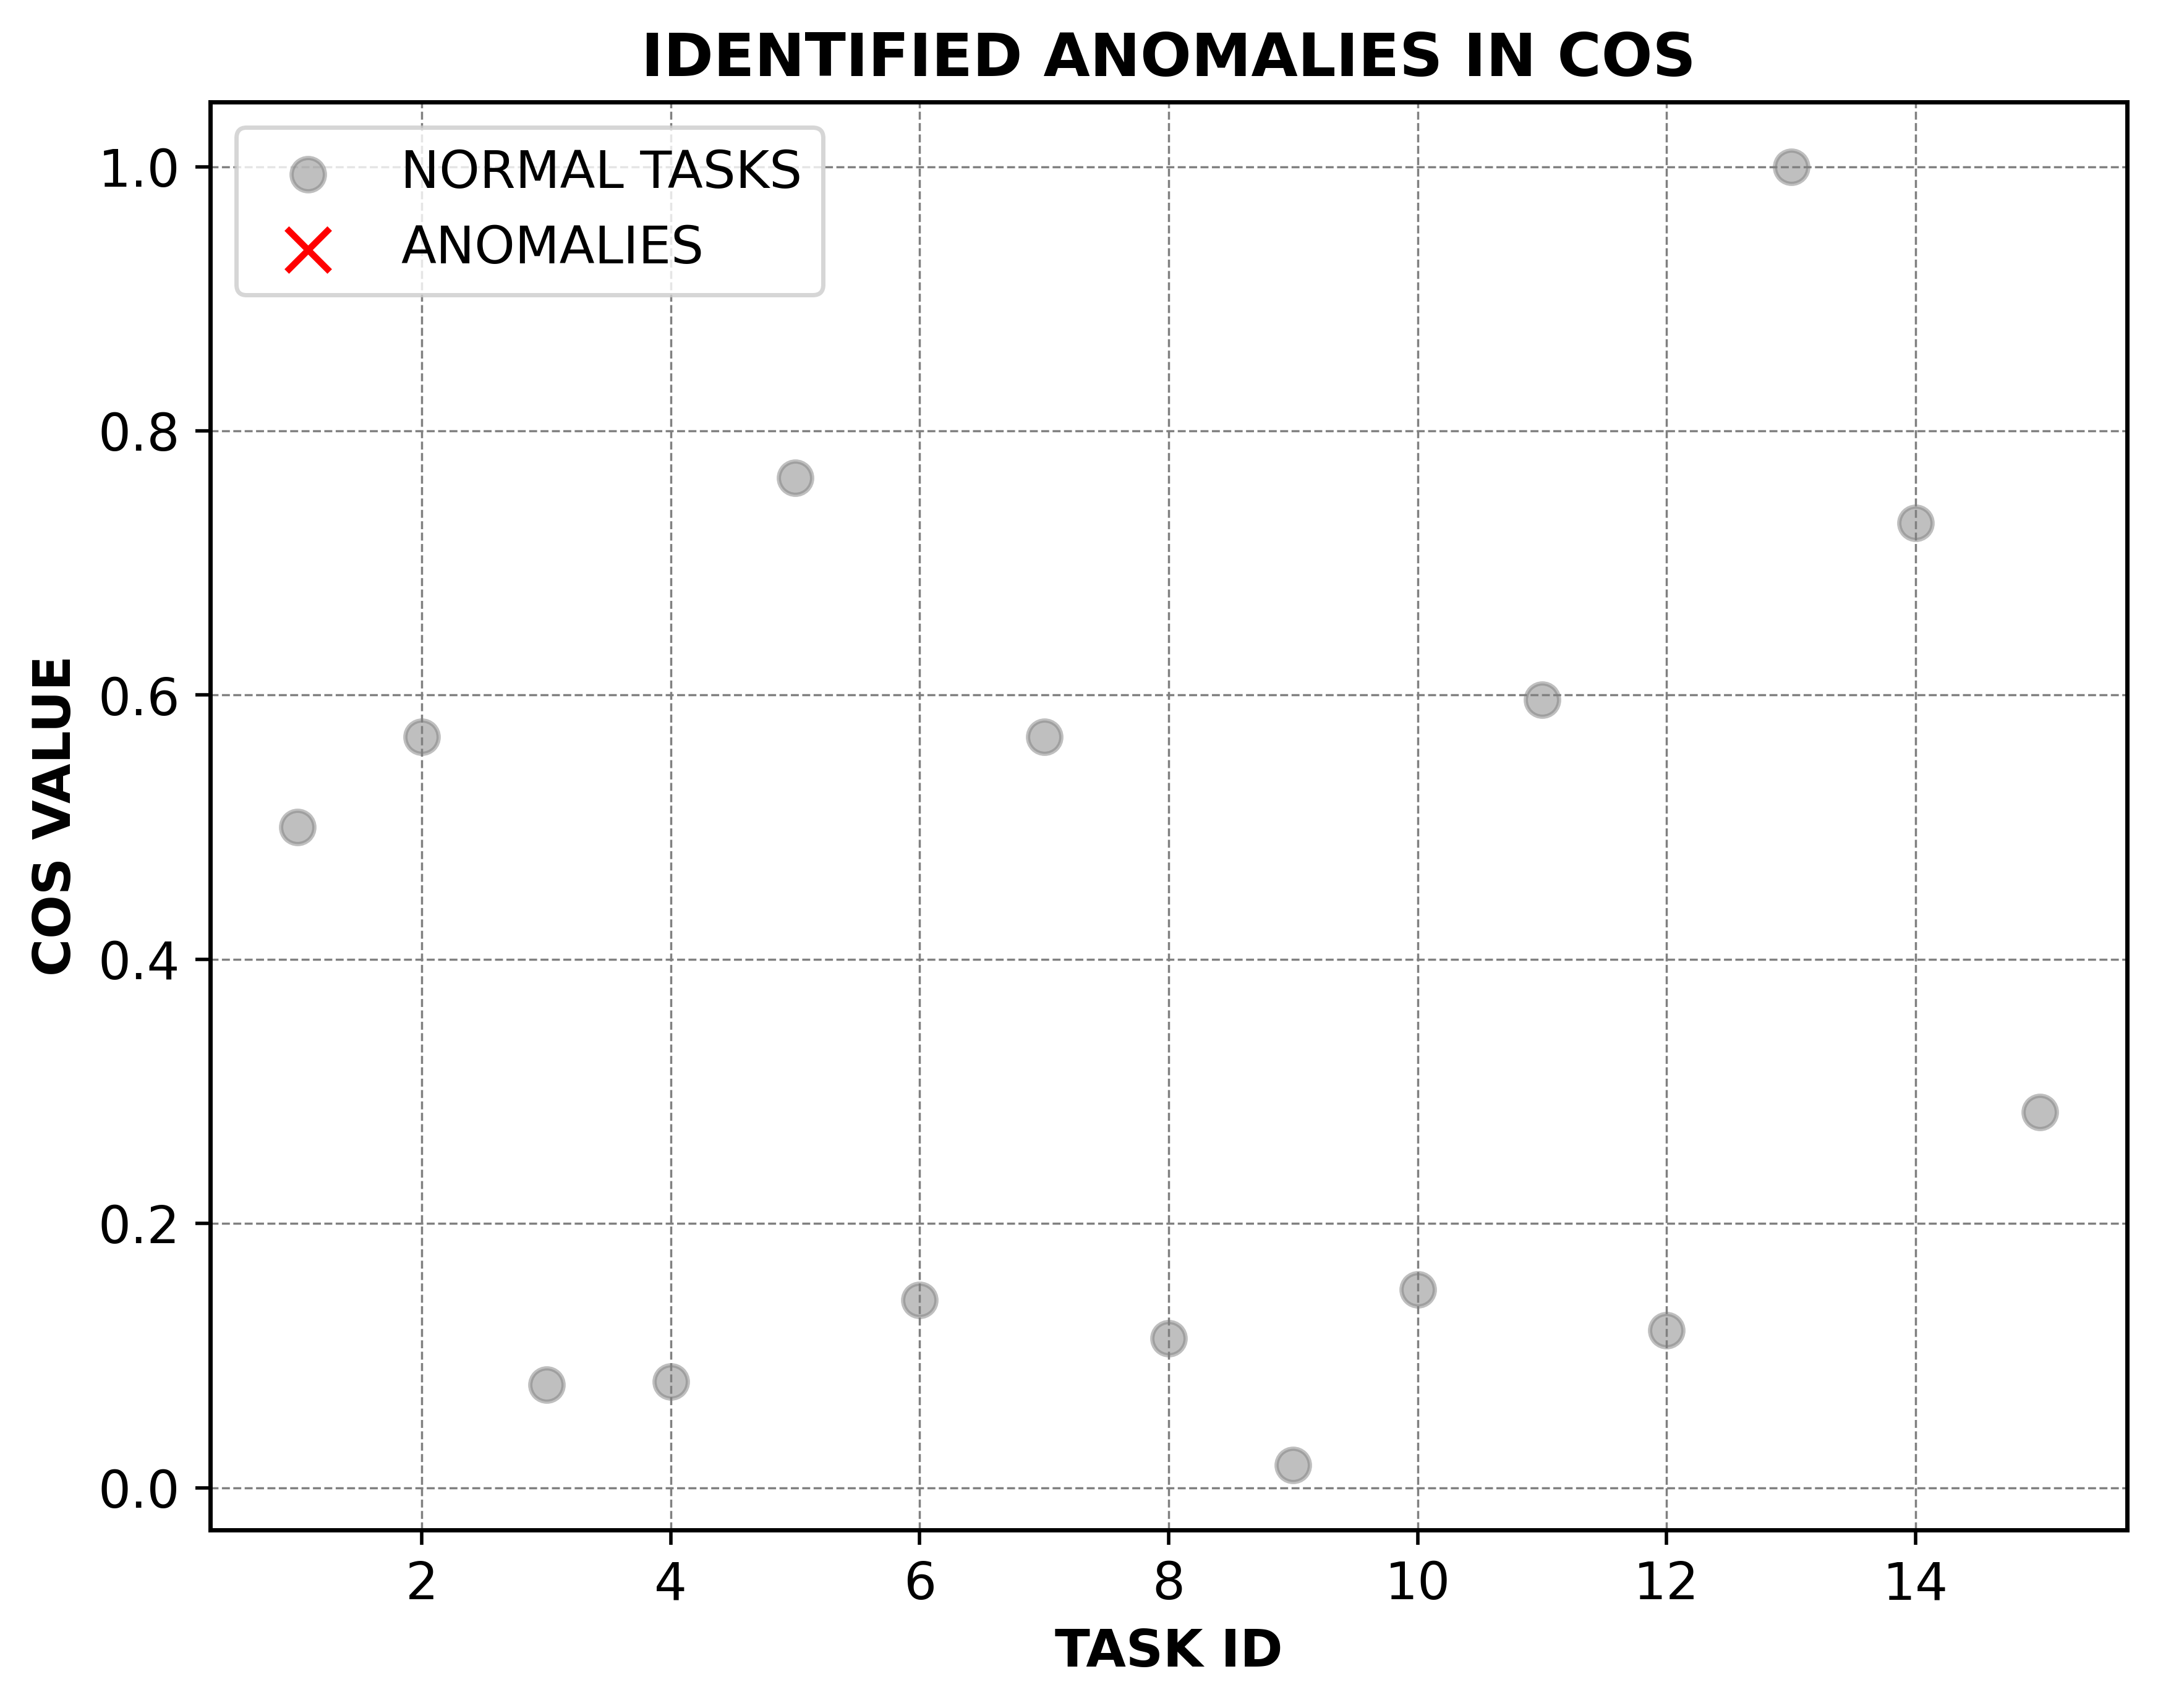

In [15]:
anomalies = df_log[df_log["Is_Anomaly"] == True]

plt.figure(figsize=(8, 6), dpi=500)
plt.scatter(df_log["Task_ID"], df_log["COS"], c="gray", alpha=0.5, label="NORMAL TASKS", s=60)
plt.scatter(anomalies["Task_ID"], anomalies["COS"], c="red", label="ANOMALIES", marker="x", s=100)

plt.xlabel("TASK ID", fontsize=12)
plt.ylabel("COS VALUE", fontsize=12)
plt.title("IDENTIFIED ANOMALIES IN COS", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

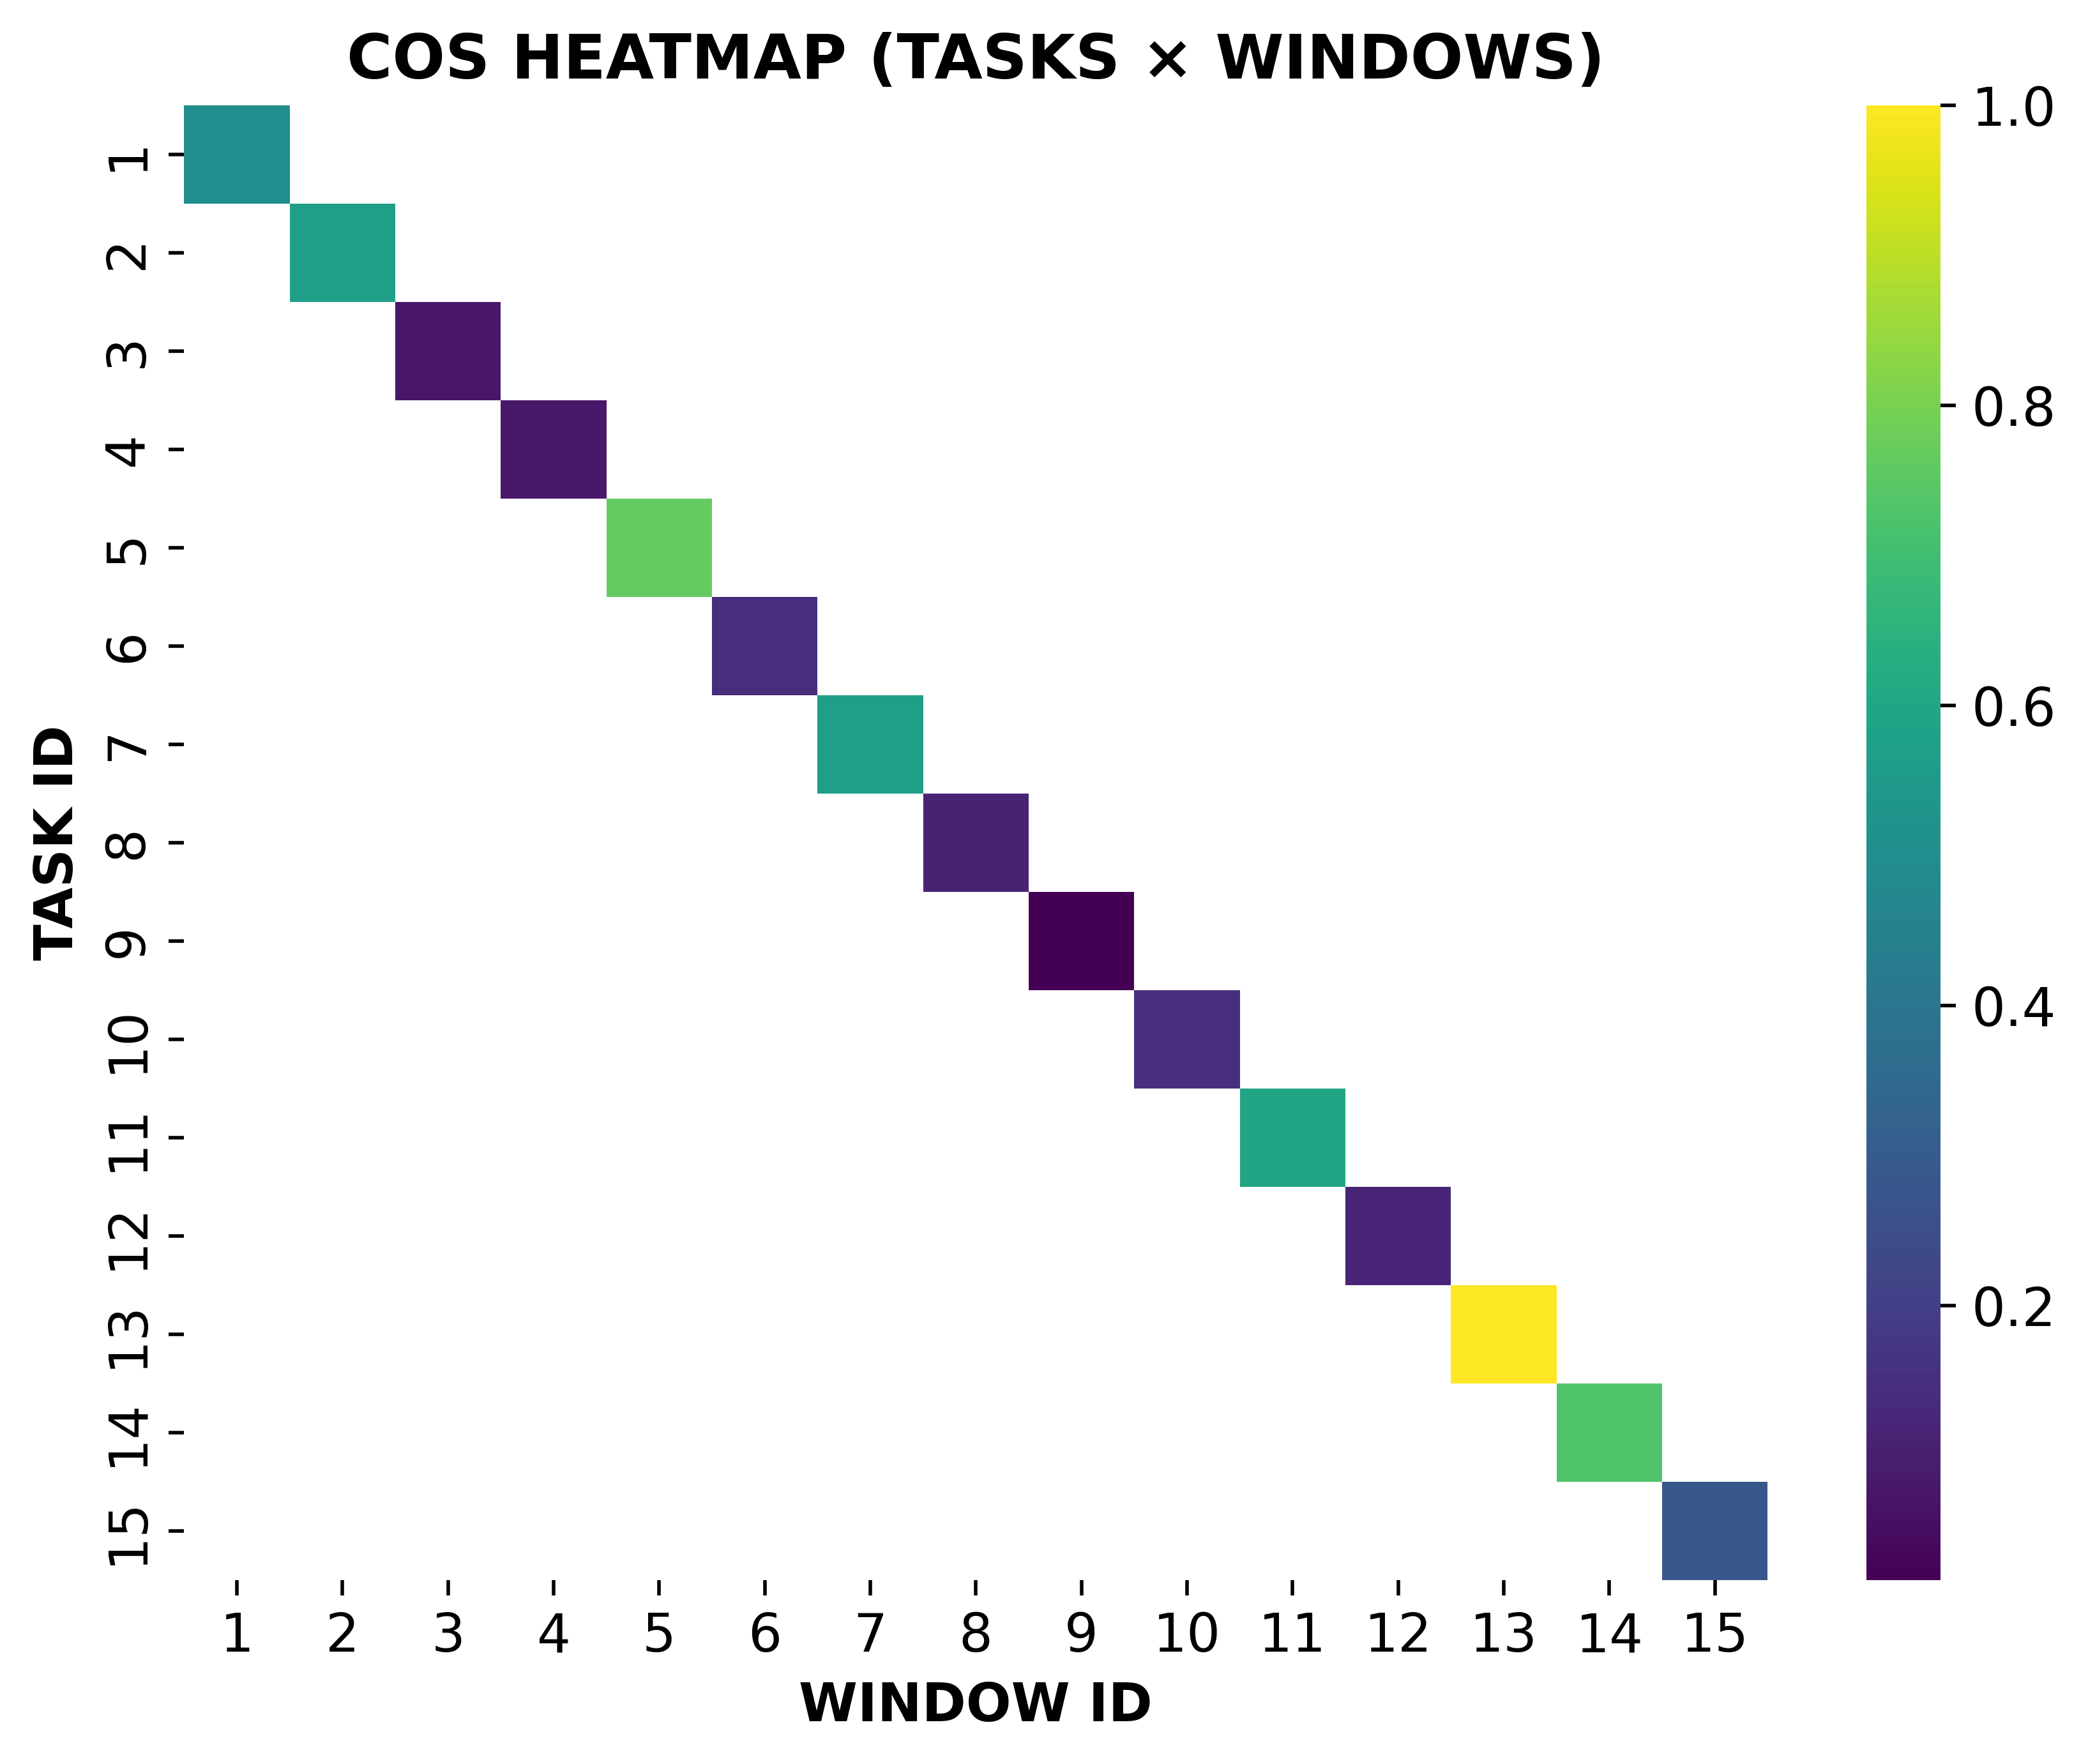

In [17]:
import seaborn as sns

pivot = df_log.pivot(index="Task_ID", columns="Window_ID", values="COS")

plt.figure(figsize=(8, 6), dpi=500)
sns.heatmap(pivot, cmap="viridis", annot=False)
plt.title("COS HEATMAP (TASKS × WINDOWS)", fontsize=14)
plt.xlabel("WINDOW ID", fontsize=12)
plt.ylabel("TASK ID", fontsize=12)
plt.show()